# POROUT BY CONSUMO
* Consumo

## Proximos pasos
* terminar grupos std, avg y trend
* convertir trend (y std, pensar) en categoricas
* eliminar columnas base
* seguir con cluster
* comparaciones respecto al porout, tablas de proporciones

In [2]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
from itertools import compress
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load,dump
import re
#from plotnine import *
#import plotnine

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [4]:
#path_data = ''
#file= f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202107.csv'
df07 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202107.csv', sep='|', decimal='.')
df06 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202106.csv', sep='|', decimal='.')
df05 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202105.csv', sep='|', decimal='.')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,5,63,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,5,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df07['file']='df07'
df06['file']='df06'
df05['file']='df05'

In [6]:
print(len(df07))
print(len(df06))
print(len(df05))

3111611
3101845
3091322


In [7]:
df=df05
df=df.append(df06)
df=df.append(df07)

In [8]:
del df05
del df06
del df07
gc.collect()

15

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304778 entries, 0 to 3111610
Data columns (total 80 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   CO_ID                                 int64  
 1   CUSTOMER_ID                           int64  
 2   CUSTCODE                              object 
 3   TELE_NUMB                             int64  
 4   TELE_NUMB_COMPLETO                    int64  
 5   IDENTIFICACION                        object 
 6   FECHA_ACTIVACION_BSCS                 object 
 7   POROUT                                int64  
 8   REGION_SIT                            object 
 9   MUNICIPIO_SIT                         object 
 10  DEPTO_SIT                             object 
 11  REGION_SIT_NOCHE                      object 
 12  MUNICIPIO_SIT_NOCHE                   object 
 13  DEPTO_SIT_NOCHE                       object 
 14  REGION_SIT_M1                         object 
 15  MUNICIPIO_SIT_M

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_ID,9304778.000,302450781.898,53892599.282,2794121.000,280525794.250,324228968.500,339973052.250,352353868.000
CUSTOMER_ID,9304778.000,311718146.609,54598731.195,478847.000,290008923.250,333737501.500,349490263.250,361878975.000
TELE_NUMB,9304778.000,3167513304.808,67581061.036,455025681.000,3124090186.500,3145285759.000,3216902983.500,3508997887.000
TELE_NUMB_COMPLETO,9304778.000,573051237881.578,7762776260.372,57455025681.000,573124090186.500,573145285759.000,573216902983.500,573508997887.000
POROUT,9304778.000,0.033,0.178,0.000,0.000,0.000,0.000,1.000
PROM_SEGUNDOS_MA,4080708.000,303.242,322.627,0.000,104.886,212.500,393.012,36231.500
PROM_SEGUNDOS_M1,4040402.000,307.539,327.997,0.000,105.625,215.065,398.593,30830.300
PROM_SEGUNDOS_M2,4047358.000,306.863,329.147,0.000,105.964,214.550,396.750,49784.526
PROM_SEGUNDOS_M3,4043793.000,307.486,329.710,0.000,105.667,214.240,397.106,34042.000
PROM_SEGUNDOS_M4,2980213.000,316.697,331.585,0.000,112.840,224.316,409.687,29007.235


In [11]:
def tipoDocumento(dni):    
    #text='9005514169.0'
    pos=dni.find('.')
    if pos != -1:
        dni=dni[0:pos]    
    longitud=len(dni)
    inicial=dni[0]
    respuesta="desconocido"
    if (longitud == 9 or longitud==10) and (inicial=='9' or inicial=='8'):
        respuesta="NIT"
    elif (longitud == 7 or longitud==8):
        respuesta="cedula"
    elif (longitud == 10) and (inicial=='1'):
        respuesta="cedula"
    elif longitud<=6:
        respuesta="sin id"
    return respuesta

In [12]:
###  contar nullos en identificacion
df['IDENTIFICACION'].isnull().sum()

5

In [13]:
df['IDENTIFICACION'].fillna(0, inplace=True)

In [14]:
df['IDENTIFICACION']=df[['IDENTIFICACION']].applymap(str) 

#### Próximos pasos
* descartar columnas sin información



In [15]:
df['tipo_id']=df['IDENTIFICACION'].apply(tipoDocumento)

In [16]:
df['tipo_id'].value_counts()

NIT            8260485
cedula          950408
sin id           65334
desconocido      28551
Name: tipo_id, dtype: int64

In [17]:
df[df['tipo_id']=='desconocido'].sample(20)

,CO_ID,CUSTOMER_ID,CUSTCODE,TELE_NUMB,TELE_NUMB_COMPLETO,IDENTIFICACION,FECHA_ACTIVACION_BSCS,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,CANT_SMS_MA,CANT_SMS_M1,CANT_SMS_M2,CANT_SMS_M3,CANT_SMS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_WAZE,TOTAL_MB_YOUTUBE,TOTAL_MB_SPOTIFY,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON2_MA,RAZON3_MA,RAZON1_M1,RAZON2_M1,RAZON3_M1,RAZON1_M2,RAZON2_M2,RAZON3_M2,RAZON1_M3,RAZON2_M3,RAZON3_M3,RAZON1_M4,RAZON2_M4,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,file,tipo_id
308016,287845497,297333871,2.203351520,3112805955,573112805955,777777777,2019-07-06 10:48:15.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NorOccidente,Caucasia,Antioquia,NorOccidente,Caucasia,Antioquia,47.000,1252.357,448.739,38.500,1649.636,139759.722,15663223.780,4942875.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.000,192.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
2151686,151845381,157163893,2.71274706,3128919752,573128919752,11503443608,2014-02-13 23:15:27.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.829,902.486,712.500,845.364,798.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
219231,284333155,293819430,2.200251664,3214805519,573214805519,777777777,2019-05-23 14:33:07.0,0,NorOccidente,El Carmen De Atrato,Choco,NorOccidente,El Carmen De Atrato,Choco,NorOccidente,El Carmen De Atrato,Choco,NorOccidente,El Carmen De Atrato,Choco,537.049,375.594,355.941,497.370,302.800,3217676.151,785076.854,1345829.756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.000,607.000,0.000,0.000,0.000,27.000,0.000,0.000,871.000,NaN,NaN,NaN,475.030,841.697,1148.062,739.000,0.000,1.000,1.000,-1000.000,Cobro servicio contenido Speedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
1282695,254680732,264121820,2.174053325,3102465445,573102465445,777777777,2018-04-06 16:39:09.0,0,SurOccidente,Toro,Valle del Cauca,SurOccidente,Toro,Valle del Cauca,SurOccidente,Toro,Valle del Cauca,SurOccidente,Toro,Valle del Cauca,60.903,109.773,213.294,164.778,149.853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648.001,806.620,861.936,1212.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df07,desconocido
1809171,245128851,254550076,2.165536276,3222679918,573222679918,777777777,2017-11-16 16:25:25.0,0,SurOccidente,Neiva,Huila,SurOccidente,Neiva,Huila,SurOccidente,Neiva,Huila,SurOccidente,Neiva,Huila,306.061,312.677,442.095,383.250,175.350,26510872.037,12606067.526,3343107.795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2329.000,3953.000,94.000,68.000,0.000,2418.000,0.000,28.000,16484.000,NaN,NaN,NaN,0.000,0.000,0.000,1292.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
1798660,312104362,321607345,2.224983232,3215939340,573215939340,110784434,2020-04-28 00:00:26.0,1,SurOccidente,Cal

###  Filtrar solo documentos con cédulas

In [18]:
df=df[df['tipo_id']=='cedula']

In [19]:
df['POROUT'].value_counts()

0    749131
1    201277
Name: POROUT, dtype: int64

In [20]:
# agrupación por identificación
dup=df[['CO_ID','file']].value_counts().to_frame().sort_values(by=0, ascending=False)

In [21]:
df.drop_duplicates(subset=['CO_ID','file'], inplace=True)

In [22]:
td_df=pd.pivot_table(df, index='CO_ID', columns='file', values='POROUT', aggfunc=np.sum, fill_value=0)

In [23]:
td_df['sel_porout']=td_df.max(axis=1)

In [24]:
td_df['sel_porout'].value_counts()

0    647047
1    201274
Name: sel_porout, dtype: int64

In [25]:
td_df['sel_porout'].value_counts()/len(td_df)

0   0.763
1   0.237
Name: sel_porout, dtype: float64

### Selección de variables

In [26]:
### varibles sin información

In [27]:
df.columns.values

array(['CO_ID', 'CUSTOMER_ID', 'CUSTCODE', 'TELE_NUMB',
       'TELE_NUMB_COMPLETO', 'IDENTIFICACION', 'FECHA_ACTIVACION_BSCS',
       'POROUT', 'REGION_SIT', 'MUNICIPIO_SIT', 'DEPTO_SIT',
       'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE', 'DEPTO_SIT_NOCHE',
       'REGION_SIT_M1', 'MUNICIPIO_SIT_M1', 'DEPTO_SIT_M1',
       'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1',
       'DEPTO_SIT_NOCHE_M1', 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1',
       'PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
       'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3',
       'PROM_DATOS_M4', 'CANT_SMS_MA', 'CANT_SMS_M1', 'CANT_SMS_M2',
       'CANT_SMS_M3', 'CANT_SMS_M4', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_WAZE', 'TOTAL_MB_YOUTUBE',
       'TOTAL_MB_SPOTIFY', 'TOTAL_MB_GOOGLE_MAPS', 'CONSUMO_TOTAL_MB',
       'CANT_PAQ_MAS_COMPRADO_MES', 'VLR_PAQ_MAS_COMPRADO_MES',
       'NOMBRE_PAQ_MAS_COMPR

In [28]:
variablesSinInfo=df.nunique().to_frame()

In [29]:
#variablesSinInfo

In [30]:
df['TOTAL_MB_WAZE'].value_counts()

0.000    423945
Name: TOTAL_MB_WAZE, dtype: int64

# Sin información de Waze o Spotify

In [31]:
variablesSinInfo[variablesSinInfo[0]<=1]

,0
CANT_SMS_MA,0
CANT_SMS_M1,0
CANT_SMS_M2,0
CANT_SMS_M3,0
CANT_SMS_M4,0
TOTAL_MB_WAZE,1
TOTAL_MB_SPOTIFY,1
RAZON2_MA,0
RAZON3_MA,0
RAZON2_M1,0


In [32]:
### eliminar columnas sin info
df.drop(columns=variablesSinInfo[variablesSinInfo[0]<=1].index.values, inplace=True)

In [33]:
### columnas ID
col_id=['CUSTOMER_ID','CUSTCODE','TELE_NUMB','TELE_NUMB_COMPLETO']

In [34]:
df.drop(columns=col_id, inplace=True)

In [35]:
df['FECHA_ACTIVACION_BSCS'] = df['FECHA_ACTIVACION_BSCS'].astype('datetime64[D]')

In [36]:
maxFecha=max(df['FECHA_ACTIVACION_BSCS'])

In [37]:
df.dtypes['FECHA_ACTIVACION_BSCS']

dtype('<M8[ns]')

In [38]:
df['ACTIGUEDAD_ACT_BSCS']=maxFecha-df['FECHA_ACTIVACION_BSCS']

In [39]:
df['ACTIGUEDAD_ACT_BSCS']=(df['ACTIGUEDAD_ACT_BSCS']/ np.timedelta64(1, 'D')).astype(int)

In [40]:
df.drop(columns=['FECHA_ACTIVACION_BSCS'],inplace=True)

In [41]:
df.head(2)

,CO_ID,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,file,ACTIGUEDAD_ACT_BSCS
6,275833170,1093221170,0,NorOccidente,Pereira,Risaralda,NorOccidente,Pereira,Risaralda,NorOccidente,Pereira,Risaralda,NorOccidente,Pereira,Risaralda,666.568,946.444,615.772,476.200,463.735,67.365,0.000,128469.653,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,121.680,201.680,1.680,780.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,920
9,193337319,43902118,0,NorOccidente,Remedios,Antioquia,NorOccidente,Remedios,Antioquia,NorOccidente,Remedios,Antioquia,NorOccidente,Remedios,Antioquia,191.783,769.821,611.615,351.611,508.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,584.967,856.097,1724.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,1972


In [42]:
df.columns.values

array(['CO_ID', 'IDENTIFICACION', 'POROUT', 'REGION_SIT', 'MUNICIPIO_SIT',
       'DEPTO_SIT', 'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE',
       'DEPTO_SIT_NOCHE', 'REGION_SIT_M1', 'MUNICIPIO_SIT_M1',
       'DEPTO_SIT_M1', 'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1',
       'DEPTO_SIT_NOCHE_M1', 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1',
       'PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
       'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3',
       'PROM_DATOS_M4', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS',
       'CONSUMO_TOTAL_MB', 'CANT_PAQ_MAS_COMPRADO_MES',
       'VLR_PAQ_MAS_COMPRADO_MES', 'NOMBRE_PAQ_MAS_COMPRADO_MES',
       'PROMEDIO_SALDO_MES', 'PROMEDIO_SALDO_M1', 'PROMEDIO_SALDO_M2',
       'ANTIGUEDAD_USUARIO', 'TOTAL_VALOR_DE_ADELANTA_SALDO',
       'ES_SMARTPHONE', 'CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR',
       'VLR_PAQ_MAS_CO

In [43]:
len(df.columns.values)

59

### Variables categoricas

In [12]:
varid=['CO_ID', 'IDENTIFICACION']
varBin=['POROUT','ES_SMARTPHONE']
varNum=['TOTAL_VALOR_DE_ADELANTA_SALDO','file'] #revisar

In [13]:
varCatGeo=['REGION_SIT', 'MUNICIPIO_SIT','DEPTO_SIT', 'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE','DEPTO_SIT_NOCHE', 'REGION_SIT_M1', 'MUNICIPIO_SIT_M1',
       'DEPTO_SIT_M1', 'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1','DEPTO_SIT_NOCHE_M1']
varCatRazones=['RAZON1_MA', 'RAZON1_M1','RAZON2_M2', 'RAZON3_M3', 'RAZON3_M4']

In [14]:
varNumConLag=[ 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1','PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
              'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3','PROM_DATOS_M4',
             'PROMEDIO_SALDO_MES', 'PROMEDIO_SALDO_M1', 'PROMEDIO_SALDO_M2']
varBinConLag=['DESACTIVACION_PORTACION_M1', 'DESACTIVACION_PORTACION_M2','DESACTIVACION_PORTACION_M3', 'DESACTIVACION_PORTACION_M4',
       'ACTIVACION_PORTACION_M1', 'ACTIVACION_PORTACION_M2','ACTIVACION_PORTACION_M3', 'ACTIVACION_PORTACION_M4']

In [15]:
varPaq=['NOMBRE_PAQ_MAS_COMPRADO_MES','CANT_PAQ_MAS_COMPRADO_MES','VLR_PAQ_MAS_COMPRADO_MES',
        'NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR','CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR','VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR']
varConsumo=['TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT','TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS','CONSUMO_TOTAL_MB']

In [16]:
varAntiguedades=['ANTIGUEDAD_USUARIO','ACTIGUEDAD_ACT_BSCS']

In [49]:
df['RAZON1_M1'].value_counts()

CANCELACION - Solicitud                                          2498
COMERCIAL - Condiciones de venta                                 1874
INFORMACION - Informacion                                        1186
INFORMACION - Sim card                                           1147
FACTURACION - Explicacion factura                                 736
COMERCIAL - Informacion                                           684
INFORMACION - Suspension                                          650
VOZ Y DATOS - Servicios adicioales                                317
COMERCIAL - Informacion                                           301
INFORMACION - Equipo                                              296
CANCELACION - Informacion                                         291
PQR - PQR                                                         226
COBRO - Equipo                                                    215
SERVICIO - Equipo                                                 199
COBRO - Soporte     

In [50]:
(len(varid)+len(varBin)+len(varCatGeo)+len(varCatRazones)+len(varNumConLag)+len(varBinConLag)+len(varPaq)+len(varConsumo)+len(varAntiguedades))

57

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_ID,950404.000,267012684.811,77159699.317,7045723.000,229233686.000,281637251.000,332161763.500,352353868.000
POROUT,950404.000,0.212,0.409,0.000,0.000,0.000,0.000,1.000
PROM_SEGUNDOS_MA,617592.000,329.357,311.442,0.000,135.203,245.149,422.951,28322.778
PROM_SEGUNDOS_M1,616892.000,332.500,314.651,0.000,135.313,247.211,427.603,20355.316
PROM_SEGUNDOS_M2,620339.000,329.498,312.150,0.000,134.111,244.548,423.426,21427.894
PROM_SEGUNDOS_M3,616382.000,331.732,317.870,0.000,134.042,245.400,425.938,34042.000
PROM_SEGUNDOS_M4,508222.000,336.106,319.620,0.000,135.092,249.200,433.245,15141.811
PROM_DATOS_MA,511102.000,5231576.176,10088143.018,0.000,25062.256,1423188.027,5965031.696,457774549.395
PROM_DATOS_M1,504757.000,4958883.373,10312483.408,0.000,23153.316,1257582.742,5324508.272,752477712.635
PROM_DATOS_M2,503667.000,4790612.977,10253245.264,0.000,25092.274,1240921.411,4940722.719,876200918.885


##  Ejercicio 1
* Medidas de agrupación variables (tendencia y promedio)
* Selección de casos  (ultimo caso para los clientes sin porout).  mmm ultimo archivo por cliente
* Ejercicio 2, es sin seleccionar ultimos caso

* Ejercicio 1: clientes con Porout (3 meses) vs clientes sin port
* Ejercicio 2: clientes con porout por mes.  El mismo cliente aparece como sin porout un mes y como porout en otro


#### Máximo archivo por cliente

In [52]:
maxFile=df.groupby(['CO_ID'])['file'].max().to_frame()

In [53]:
maxFile.reset_index(inplace=True)

In [54]:
# merged_df = left_df.merge(right_df, how='inner', left_on=["A", "B"], right_on=["A2","B2"])
tabla_1 = maxFile.merge(df, how='left', left_on=["CO_ID", "file"], right_on=["CO_ID", "file"])

### Agrupacion promedio y tendencia

In [17]:
#variables
varMedidas=['PROM_SEGUNDOS','PROM_DATOS','PROMEDIO_SALDO']

In [56]:
## funciones
def categorizacion_std2(x, q1=0.2 , q2=0.5):
    corte_up=0.5    
    if ( np.isnan(x) ):
        return np.NAN
    elif(x>q2):
        return "dispersed"   
    elif(x>q1):
        return "moderate"
    else:
        return "united"
    
## Tendencia
def calcSlope(data, order=1):
    ind= list(reversed(range(0,len(data))))
    #print(ind)
    #print(data)
    #print(np.isfinite(data))
    idx=np.isfinite(ind) & np.isfinite(data)
    if idx.sum()<=1 :
        return np.NAN
    else:
        #print(list(compress(ind, idx)))
        ind=list(compress(ind, idx))
        data=list(compress(data, idx))
        coeffs = np.polyfit(ind, data, order)
        slope = coeffs[-2]
        return float(slope)
    
def calcSlopeRow(row,prefix):
    ##data=row.filter(regex='^'+prefix,axis=1).values    
    data=list(row.filter(regex='^'+prefix).values)
    ##return calcSlope(data[0])
    if(data.count('Nan')==len(data)):
        return np.NAN
    else:
        return calcSlope(data)

def categorizacion(x):
    corte_up=0.1
    corte_dw=-0.1
    if ( np.isnan(x) ):
        return np.NAN
    elif(x>corte_up):
        return "increase"
    elif(x<corte_dw):
        return "decrease"
    else:
        return "noTrend"

In [58]:
for group in varMedidas:
    tabla_1['avg_'+group]=tabla_1.filter(regex='^'+group,axis=1).mean(axis=1)
    
    tabla_1['STD_'+group]=tabla_1.filter(regex='^'+group,axis=1).std(axis=1)
    tabla_1['STD_cat_'+group]=tabla_1['STD_'+group]/tabla_1['avg_'+group]
    q1=tabla_1['STD_cat_'+group].quantile(0.33)
    q2=tabla_1['STD_cat_'+group].quantile(0.66)
    tabla_1['STD_cat2_'+group]=tabla_1['STD_cat_'+group].apply(categorizacion_std2,q1=q1, q2=q2)

    tabla_1['slope_'+group]=tabla_1.apply(lambda x: calcSlopeRow(x,group), axis=1)
    tabla_1['slope_cat_'+group]=tabla_1['slope_'+group]/tabla_1['avg_'+group]
    tabla_1['slope_cat2_'+group]=tabla_1['slope_cat_'+group].apply(categorizacion)    

#### fin simplicacion Código

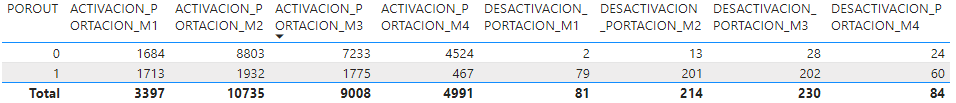

In [60]:
#GuardarTabla a este punto
tabla_1.to_csv('tabla1_cp1.csv')

### Leer el archivo

In [10]:
tabla_1.head(2)

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7045723,df05,41939455.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7153200,df06,51832393.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.667,NaN,25662.357,5325.175,0.000,4789059.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tabla_1=pd.read_csv('tabla1_cp1.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
tabla_1.set_index('Unnamed: 0', inplace=True)

In [ ]:
## validar si algun co_id tiene más de una activación o desactivación

### One Foot Encoder
*  RAZON  conteo
*  PAQ_MAS_COMPRADO

## Próximos Pasos

*  Separar por guion Razones
 * Tomar la primera parte y contar por co_id
* Dummizar paquetes (pivot)
 * sumar cantidad
 * sumar valor
* Ordenar columnas, primero categoricas y luego numericas
* Aplicar perfilamiento
* Generar tablas de participación Porout

### Razones

In [103]:
#tabla_1.drop(columns=['RAZON1'],inplace=True)

In [18]:
varCatRazones

['RAZON1_MA', 'RAZON1_M1', 'RAZON2_M2', 'RAZON3_M3', 'RAZON3_M4']

In [81]:
tabla_1['RAZON1_MA'].iloc[25:35]

25                           NaN
26                           NaN
27                           NaN
28                           NaN
29                           NaN
30    INFORMACION - Informacion 
31                           NaN
32                           NaN
33                           NaN
34                           NaN
Name: RAZON1_MA, dtype: object

In [69]:
tabla_1['RAZON1_MA'].nunique()

89

In [69]:
colRazones=[]
for col in  varCatRazones:
    tabla_1['sim_'+col]=tabla_1[col].str.split('-').str[0].str.strip()
    tabla_1['sim_'+col].fillna('sinRazon',inplace=True)
    colRazones.extend(tabla_1['sim_'+col].unique())

In [71]:
colRazones = list(dict.fromkeys(colRazones))

In [72]:
colRazones

['sinRazon',
 'INFORMACION',
 'COMERCIAL',
 'FACTURACION',
 'CANCELACION',
 'VOZ Y DATOS',
 'SERVICIO',
 'PQR',
 'PAGO',
 'COBRO',
 'EQUIPO']

In [81]:
i=0
for col in  varCatRazones:
    i=i+1
    #abla_aux=pd.pivot_table(tabla_1[['CO_ID','sim_RAZON1_MA']], index='CO_ID', columns=['sim_RAZON1_MA'], aggfunc=len,fill_value=0)
    tabla_aux=pd.pivot_table(tabla_1[['CO_ID','sim_'+col]], index='CO_ID', columns=['sim_'+col], aggfunc=len,fill_value=0)
    
    for colVal in colRazones:
        if colVal not in tabla_aux.columns.values:
            tabla_aux[colVal]=0        
    
    if i==1:
        tabla_razones = tabla_aux
    else:
        tabla_razones = (tabla_razones+tabla_aux)

In [93]:
#tabla_1['sim_RAZON1']=tabla_1['RAZON1_MA'].str.split('-').str[0].str.strip()

In [250]:
tabla_razones.sample(20)

,CANCELACION,COBRO,COMERCIAL,EQUIPO,FACTURACION,INFORMACION,PAGO,PQR,SERVICIO,VOZ Y DATOS,sinRazon
CO_ID,,,,,,,,,,,
252798881,0,0,0,0,0,0,0,0,0,0,5
333492498,0,0,0,0,0,0,0,0,0,0,5
271957083,0,0,0,0,0,0,0,0,0,0,5
321890307,0,0,0,0,0,0,0,0,0,0,5
337421490,0,0,0,0,0,0,0,0,0,0,5
344122284,0,0,0,0,0,0,0,0,0,0,5
278902976,0,0,0,0,0,0,0,0,0,0,5
228480066,0,0,0,0,0,0,0,0,0,0,5
297743061,0,0,0,0,0,0,0,0,0,0,5


In [251]:
colRazones=tabla_razones.columns.values

In [255]:
colRazones='razon_'+colRazones

In [256]:
tabla_razones.columns=colRazones

In [257]:
tabla_razones.sample(5)

,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,razon_sinRazon
CO_ID,,,,,,,,,,,
187753481,0,0,0,0,0,0,0,0,0,0,5
315794563,0,0,0,0,0,0,0,0,0,0,5
121181001,0,0,0,0,0,0,0,0,0,0,5
324111979,0,0,0,0,0,0,0,0,0,0,5
242524019,0,0,0,0,0,0,0,0,0,0,5


#### PAQ_MAS_COMPRADO
* Agrupar por tipo de servicio

In [84]:
tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES'].nunique()

74

In [102]:
tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES'].fillna('sinPaquete', inplace=True)
tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR'].fillna('sinPaquete', inplace=True)

In [148]:
nomPaquetes=tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES'].unique()

In [149]:
nomPaquetes

array(['sinPaquete',
       'Navegacion 50MB + ChatWhatsapp Facebook Twitter por 24 horas',
       'Navegacion 110 MB 1 Dia', 'Cobro servicio contenido Speedy',
       'Paquetes Minutos migracion', 'Datos 200MB+WA Vig 1 dia',
       'Datos 800MB+WTF Vig 3 dias', 'Paquete de datos 200MB+WA',
       'Paquete de datos 50MB+WA', 'Navegacion 50 MB 1 Dia',
       'Navegacion 40MB + ChatWhatsapp Facebook Twitter por 24 horas',
       'Chat WhatsApp por 15 dias', 'Datos 400MB+WTF Vig 1 dia',
       'Todo Incluido Voz Ilimitados + WTF + 700 MB 15 Dias',
       'Todo Incluido 250 min + 1000SMS + 2,2 GB 15 Dias REC',
       'Navegacion 120MB + ChatWhatsapp Facebook Twitter por 3 dias',
       'Navegacion 240 MB 3 Dias', 'Datos 2GB+WTF Vig 7 dias',
       'Cobro Paquete de Youtube por 1 hora TAT',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 800 MB 20 Dias REC',
       'Navegacion 120MB + ChatWhatsapp Facebook Twitter por 2 dias',
       'PqM LDI Venezuela10MIN',
       'Todo Incluido Voz Il

In [127]:
textToken=[]
i=0
for text in nomPaquetes:   
    #print(text)    
    #text = re.sub(r'+', ' ', str(text))
    text = text.replace('+', ' ')
    text = text.replace(',', ' ')
    text = text.replace('.', ' ')
    # Sustituir los espacios en blanco en uno solo
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\d', ' ', str(text))
    text = text.lower()
    textToken=textToken+re.split(' ',text)    
    #print(text)
    i=i+1

In [128]:
textToken = list(dict.fromkeys(textToken))

In [129]:
textToken

['sinpaquete',
 'navegacion',
 '',
 'mb',
 'chatwhatsapp',
 'facebook',
 'twitter',
 'por',
 'horas',
 'dia',
 'cobro',
 'servicio',
 'contenido',
 'speedy',
 'paquetes',
 'minutos',
 'migracion',
 'datos',
 'wa',
 'vig',
 'wtf',
 'dias',
 'paquete',
 'de',
 'chat',
 'whatsapp',
 'todo',
 'incluido',
 'voz',
 'ilimitados',
 'min',
 'sms',
 'gb',
 'rec',
 'youtube',
 'hora',
 'tat',
 'y',
 'pqm',
 'ldi',
 'venezuela',
 'navegaciã³n',
 'ilimitada',
 '$',
 'con',
 'suscripcion',
 'usacanprmex',
 'waze',
 'compra',
 'mensajes',
 'texto',
 'en',
 'plataforma',
 'prepago',
 'sinfronteras',
 'instagram',
 'para',
 'td',
 'demanda',
 'recarga',
 'pasatiempo',
 'pre-pre',
 'mas',
 'adicional',
 'snapchat',
 'horastat',
 'preferencial',
 'recurrente',
 'adicionales']

In [86]:
tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR'].nunique()

70

In [87]:
tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR'].unique()

array([nan, 'Cobro servicio contenido Speedy',
       'Paquete de datos 200MB+WA',
       'Navegacion 50MB + ChatWhatsapp Facebook Twitter por 24 horas',
       'Paquetes Minutos migracion', 'Paquete de datos 50MB+WA',
       'Navegacion 40MB + ChatWhatsapp Facebook Twitter por 24 horas',
       'Navegacion 50 MB 1 Dia',
       'Todo Incluido Voz Ilimitados + WTF + 700 MB 15 Dias',
       'Navegacion 110 MB 1 Dia',
       'Todo Incluido 250 min + 1000SMS + 2,2 GB 15 Dias REC',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 500 MB 7 Dias REC',
       'Navegacion 120MB + ChatWhatsapp Facebook Twitter por 2 dias',
       'Navegacion 120MB + ChatWhatsapp Facebook Twitter por 3 dias',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 800 MB 20 Dias REC',
       'Chat WhatsApp por 15 dias', 'PqM LDI Sinfronteras50MIN',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 400 MB 10 Dias REC',
       'PqM LDI Venezuela25MIN',
       'Navegacion 2GB + ChatWhatsapp Facebook Twitter por 30 dia

In [131]:
nomPaquetes_ma=tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR'].unique()

In [132]:
nomPaquetes_ma

array(['sinPaquete', 'Cobro servicio contenido Speedy',
       'Paquete de datos 200MB+WA',
       'Navegacion 50MB + ChatWhatsapp Facebook Twitter por 24 horas',
       'Paquetes Minutos migracion', 'Paquete de datos 50MB+WA',
       'Navegacion 40MB + ChatWhatsapp Facebook Twitter por 24 horas',
       'Navegacion 50 MB 1 Dia',
       'Todo Incluido Voz Ilimitados + WTF + 700 MB 15 Dias',
       'Navegacion 110 MB 1 Dia',
       'Todo Incluido 250 min + 1000SMS + 2,2 GB 15 Dias REC',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 500 MB 7 Dias REC',
       'Navegacion 120MB + ChatWhatsapp Facebook Twitter por 2 dias',
       'Navegacion 120MB + ChatWhatsapp Facebook Twitter por 3 dias',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 800 MB 20 Dias REC',
       'Chat WhatsApp por 15 dias', 'PqM LDI Sinfronteras50MIN',
       'Todo Incluido Voz y SMS Ilimitados + WTF + 400 MB 10 Dias REC',
       'PqM LDI Venezuela25MIN',
       'Navegacion 2GB + ChatWhatsapp Facebook Twitter p

In [146]:
tipoPaquetes = pd.read_csv(f'paq.csv', sep=';')

In [147]:
tipoPaquetes

,palabra,tipo
0,datos,datos
1,navegac,datos
2,empresas,empresas
3,facebook,facebook
4,instagram,Instagram
5,ldi,LargaDistancia
6,usacanprmex,LargaDistancia
7,venezuela,LargaDistancia
8,migracion,migracion
9,minutos,minutos


In [161]:
tipos=tipoPaquetes['tipo'].unique()
tipos

array(['datos', 'empresas', 'facebook', 'Instagram', 'LargaDistancia',
       'migracion', 'minutos', 'pasatiempo', 'sinpaquete', 'sms',
       'snapchat', 'speedy', 'suscripcion', 'todoIncluido', 'twitter',
       'waze', 'ws', 'wtf', 'youtube'], dtype=object)

In [177]:
for col in tipos:
    tabla_1['paq_'+col]=0

In [158]:
texto="hola mundo voz"
#dicPalabra={}
#for p1 in tipoPaquetes['palabra']:
for i,row in tipoPaquetes.iterrows():
    arrAux=[]
    if row['palabra'] in texto:
        print(row['tipo'])

minutos


In [ ]:
tabla_1.head(3)

In [167]:
tabla_1.loc[2]['file']

'df06'

In [ ]:
"""
def grupoPaquete(texto):
    texto = texto.lower()
    for p1 in tipoPaquetes
#    tabla_1['NOMBRE_PAQ_MAS_COMPRADO_MES']"""

In [169]:
t1="hola mundo"
t2= " cruel "
print(t1+t2)

hola mundo cruel 


In [176]:
tabla_1['paq_datos'].sum()

0

In [224]:
#tabla_1
for i,row in tabla_1.iterrows():
    texto= row['NOMBRE_PAQ_MAS_COMPRADO_MES']+' '+row['NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR']
    texto=texto.lower()
    #print(texto)
    for ip,rowp in tipoPaquetes.iterrows():
    #arrAux=[]
        
        if rowp['palabra'] in texto:
            #print(rowp['tipo'])
            col=rowp['tipo']
            #if row[col]==0:
            if tabla_1.loc[i,'paq_'+col]==0:
                tabla_1.loc[i,'paq_'+col]=1    

In [247]:
tabla_1.to_csv('tabla1_cp3.csv')

In [190]:
#colMostrar=['NOMBRE_PAQ_MAS_COMPRADO_MES','NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR'].extend(tabla_1.filter(regex='^paq_',axis=1).columns)

In [226]:
tabla_1.head(2)

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7045723,df05,41939455.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sinPaquete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,7153200,df06,51832393.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.667,NaN,25662.357,5325.175,0.000,4789059.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sinPaquete,NaN,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [227]:
tabla_1[tabla_1['paq_wtf']==1].head(2)

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,8938027,df07,7225213.000,1,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,105.441,177.375,151.519,207.750,152.817,237946.719,2596.371,169095.413,1537779.650,1285154.665,28.000,1.000,0.000,0.000,7.000,0.000,103.000,1.000,-4000.000,Datos 800MB+WTF Vig 3 dias,3953.892,3217.224,3647.189,6392.000,0.000,1.000,1.000,-4390.000,Cobro servicio contenido Speedy,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6396,158.980,37.673,0.237,moderate,-12.513,-0.079,noTrend,646514.563,709172.405,1.097,dispersed,-362959.917,-0.561,decrease,3606.102,370.049,0.103,united,153.351,0.043,noTrend,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
208,10860181,df07,71367733.000,1,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,139.412,137.574,272.111,165.294,180.672,4205113.166,2440312.795,1330161.589,1870133.718,3448762.729,425.000,786.000,16.000,67.000,17.000,0.000,2362.000,1.000,-2000.000,Datos 400MB+WTF Vig 1 dia,2701.030,476.740,10969.482,6193.000,0.000,1.000,NaN,NaN,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6211,179.013,55.099,0.308,moderate,-11.024,-0.062,noTrend,2658896.800,1167276.388,0.439,united,208287.995,0.078,noTrend,4715.751,5528.900,1.172,dispersed,-4134.226,-0.877,decrease,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### Servicio WTF

In [230]:
for i,row in tabla_1.iterrows():
    if row['paq_wtf']==1:
        if row['paq_ws']==0:
            #row['paq_ws']=1
            tabla_1.loc[i,'paq_ws']=1 
        if row['paq_twitter']==0:
            #row['paq_twitter']=1
            tabla_1.loc[i,'paq_twitter']=1 
        if row['paq_facebook']==0:
            #row['paq_facebook']=1      
            tabla_1.loc[i,'paq_facebook']=1 

In [231]:
tabla_1[tabla_1['paq_wtf']==1].head(2)

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,8938027,df07,7225213.000,1,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,105.441,177.375,151.519,207.750,152.817,237946.719,2596.371,169095.413,1537779.650,1285154.665,28.000,1.000,0.000,0.000,7.000,0.000,103.000,1.000,-4000.000,Datos 800MB+WTF Vig 3 dias,3953.892,3217.224,3647.189,6392.000,0.000,1.000,1.000,-4390.000,Cobro servicio contenido Speedy,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6396,158.980,37.673,0.237,moderate,-12.513,-0.079,noTrend,646514.563,709172.405,1.097,dispersed,-362959.917,-0.561,decrease,3606.102,370.049,0.103,united,153.351,0.043,noTrend,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
208,10860181,df07,71367733.000,1,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,139.412,137.574,272.111,165.294,180.672,4205113.166,2440312.795,1330161.589,1870133.718,3448762.729,425.000,786.000,16.000,67.000,17.000,0.000,2362.000,1.000,-2000.000,Datos 400MB+WTF Vig 1 dia,2701.030,476.740,10969.482,6193.000,0.000,1.000,NaN,NaN,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6211,179.013,55.099,0.308,moderate,-11.024,-0.062,noTrend,2658896.800,1167276.388,0.439,united,208287.995,0.078,noTrend,4715.751,5528.900,1.172,dispersed,-4134.226,-0.877,decrease,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0


### cant y valor 2 meses paq

In [239]:
tabla_1['VLR_PAQ_MAS_COMPRADO_MES'].fillna(0, inplace=True)
tabla_1['VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR'].fillna(0, inplace=True)
tabla_1['CANT_PAQ_MAS_COMPRADO_MES'].fillna(0, inplace=True)
tabla_1['CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR'].fillna(0, inplace=True)

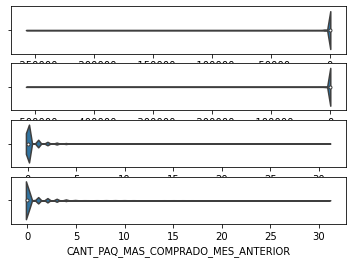

In [244]:
fig, ax = plt.subplots(4,1)
sns.violinplot(ax=ax[0],x=tabla_1['VLR_PAQ_MAS_COMPRADO_MES']);
sns.violinplot(ax=ax[1],x=tabla_1['VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR']);
sns.violinplot(ax=ax[2],x=tabla_1['CANT_PAQ_MAS_COMPRADO_MES']);
sns.violinplot(ax=ax[3],x=tabla_1['CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR']);

In [236]:
colsTipoPaq=tipoPaquetes['tipo'].unique()
colsTipoPaq

array(['datos', 'empresas', 'facebook', 'Instagram', 'LargaDistancia',
       'migracion', 'minutos', 'pasatiempo', 'sinpaquete', 'sms',
       'snapchat', 'speedy', 'suscripcion', 'todoIncluido', 'twitter',
       'waze', 'ws', 'wtf', 'youtube'], dtype=object)

In [240]:
for col in colsTipoPaq:
    tabla_1['paq_'+col+'_v']=tabla_1['paq_'+col]*(tabla_1['VLR_PAQ_MAS_COMPRADO_MES']+tabla_1['VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR'])
    tabla_1['paq_'+col+'_q']=tabla_1['paq_'+col]*(tabla_1['CANT_PAQ_MAS_COMPRADO_MES']+tabla_1['CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR'])

In [241]:
tabla_1[tabla_1['paq_wtf']==1].head(2)

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,8938027,df07,7225213.000,1,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,Oriente,Duitama,Boyaca,105.441,177.375,151.519,207.750,152.817,237946.719,2596.371,169095.413,1537779.650,1285154.665,28.000,1.000,0.000,0.000,7.000,0.000,103.000,1.000,-4000.000,Datos 800MB+WTF Vig 3 dias,3953.892,3217.224,3647.189,6392.000,0.000,1.000,1.000,-4390.000,Cobro servicio contenido Speedy,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6396,158.980,37.673,0.237,moderate,-12.513,-0.079,noTrend,646514.563,709172.405,1.097,dispersed,-362959.917,-0.561,decrease,3606.102,370.049,0.103,united,153.351,0.043,noTrend,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,-8390.000,2.000,-0.000,0.000,-8390.000,2.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-8390.000,2.000,-0.000,0.000,-0.000,0.000,-8390.000,2.000,-0.000,0.000,-8390.000,2.000,-8390.000,2.000,-0.000,0.000
208,10860181,df07,71367733.000,1,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,NorOccidente,Medellin,Antioquia,139.412,137.574,272.111,165.294,180.672,4205113.166,2440312.795,1330161.589,1870133.718,3448762.729,425.000,786.000,16.000,67.000,17.000,0.000,2362.000,1.000,-2000.000,Datos 400MB+WTF Vig 1 dia,2701.030,476.740,10969.482,6193.000,0.000,1.000,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6211,179.013,55.099,0.308,mode

### proporcion compra

In [246]:
tabla_1[['VLR_PAQ_MAS_COMPRADO_MES','VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR','CONSUMO_TOTAL_MB']].sample(10)

,VLR_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,CONSUMO_TOTAL_MB
Unnamed: 0,,,
626250,0.000,0.000,NaN
281600,0.000,0.000,NaN
365303,0.000,0.000,8607.000
25685,0.000,0.000,82.000
111729,-1000.000,0.000,0.000
559971,0.000,0.000,NaN
249627,0.000,-2000.000,5958.000
263856,0.000,0.000,646.000
4556,0.000,0.000,1.000


###  fin paquetes

In [249]:
tabla_1.set_index('CO_ID',inplace=True)

In [259]:
#tablaFinal.head(5)

,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,razon_sinRazon
CO_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7045723,df05,41939455.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,5
7153200,df06,51832393.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.667,NaN,25662.357,5325.175,0.000,4789059.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,NaN,2258.065,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

### GEO

In [261]:
varCatGeo

['REGION_SIT',
 'MUNICIPIO_SIT',
 'DEPTO_SIT',
 'REGION_SIT_NOCHE',
 'MUNICIPIO_SIT_NOCHE',
 'DEPTO_SIT_NOCHE',
 'REGION_SIT_M1',
 'MUNICIPIO_SIT_M1',
 'DEPTO_SIT_M1',
 'REGION_SIT_NOCHE_M1',
 'MUNICIPIO_SIT_NOCHE_M1',
 'DEPTO_SIT_NOCHE_M1']

In [263]:
tabla_1.filter(regex='^REGION',axis=1).head(3)

,REGION_SIT,REGION_SIT_NOCHE,REGION_SIT_M1,REGION_SIT_NOCHE_M1
CO_ID,,,,
7045723,NaN,NaN,NaN,NaN
7153200,NaN,NaN,NaN,NaN
7166147,Centro,Centro,Centro,Centro


In [271]:
len(tabla_1)

848321

In [267]:
len(tabla_1.filter(regex='^REGION',axis=1).values.tolist())

848321

In [291]:
val_Reg=tabla_1.filter(regex='^REGION',axis=1).values.tolist()

In [353]:
val_Reg

[[nan, nan, nan, nan],
 [nan, nan, nan, nan],
 ['Centro', 'Centro', 'Centro', 'Centro'],
 [nan, nan, nan, nan],
 ['NorOccidente', 'NorOccidente', 'NorOccidente', 'NorOccidente'],
 ['Oriente', 'Oriente', 'Oriente', 'Oriente'],
 ['SurOccidente', 'SurOccidente', 'SurOccidente', 'SurOccidente'],
 ['Oriente', 'Oriente', 'Oriente', 'Oriente'],
 ['Centro', 'Centro', 'Centro', 'Centro'],
 ['SurOccidente', 'SurOccidente', 'SurOccidente', 'SurOccidente'],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, 'SurOccidente', 'SurOccidente'],
 ['NorOccidente', 'NorOccidente', 'NorOccidente', 'NorOccidente'],
 ['Oriente', 'Oriente', 'Oriente', 'Oriente'],
 ['Centro', 'Centro', 'Centro', 'Centro'],
 [nan, nan, nan, nan],
 ['NorOccidente', 'NorOccidente', nan, nan],
 ['Centro', 'Centro', 'Centro', 'Centro'],
 ['Costa', 'Costa', 'Costa', 'Costa'],
 ['SurOccidente', 'SurOccidente', 'SurOccidente', 'SurOccidente'],
 ['NorOccidente', 'NorOccidente', 'NorOccidente', 'NorOccidente'],
 ['Centro', 'Centr

In [ ]:
#max(set(lst), key=lst.count)

In [355]:
val_Reg2=[0]*len(tabla_1)
val_Reg_mode2=[np.nan]*len(tabla_1)
i=0
for auxRow in val_Reg:    
    #val_Reg2[i]=len(auxRow)
    val_Reg_mode2[i]=max(set(auxRow), key=auxRow.count)
    auxRow=list(dict.fromkeys(auxRow))
    #auxRow.remove(np.nan)
    if np.nan in auxRow: auxRow.remove(np.nan)
    val_Reg2[i]=len(list(dict.fromkeys(auxRow)))
    
    i=i+1

In [356]:
val_Reg_mode2

[nan,
 nan,
 'Centro',
 nan,
 'NorOccidente',
 'Oriente',
 'SurOccidente',
 'Oriente',
 'Centro',
 'SurOccidente',
 nan,
 nan,
 nan,
 'NorOccidente',
 'Oriente',
 'Centro',
 nan,
 nan,
 'Centro',
 'Costa',
 'SurOccidente',
 'NorOccidente',
 'Centro',
 'Costa',
 'Centro',
 'NorOccidente',
 'SurOccidente',
 'SurOccidente',
 nan,
 'Centro',
 'NorOccidente',
 nan,
 nan,
 'Centro',
 'NorOccidente',
 'Costa',
 nan,
 'Costa',
 'NorOccidente',
 'SurOccidente',
 'SurOccidente',
 'Oriente',
 'NorOccidente',
 nan,
 'Costa',
 'NorOccidente',
 'Centro',
 'Costa',
 'Centro',
 nan,
 'NorOccidente',
 'SurOccidente',
 'NorOccidente',
 'Centro',
 nan,
 'NorOccidente',
 'Centro',
 'SurOccidente',
 'Costa',
 'Centro',
 nan,
 'Oriente',
 'NorOccidente',
 'Costa',
 'Centro',
 'Centro',
 'Oriente',
 'Oriente',
 'Oriente',
 'NorOccidente',
 'Costa',
 'Oriente',
 'NorOccidente',
 nan,
 'NorOccidente',
 nan,
 'NorOccidente',
 'NorOccidente',
 nan,
 nan,
 'Costa',
 'Oriente',
 'NorOccidente',
 'Oriente',
 'SurOc

In [304]:
#val_Reg2.value_counts()
Counter(val_Reg2)

Counter({0: 370441, 1: 467969, 2: 9911})

In [297]:
val_Mun=tabla_1.filter(regex='^MUNICIPIO',axis=1).values.tolist()
val_Mun

[[nan, nan, nan, nan],
 [nan, nan, nan, nan],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 [nan, nan, nan, nan],
 ['Quindio', 'Quindio', 'Quindio', 'Quindio'],
 ['Santander', 'Santander', 'Santander', 'Santander'],
 ['Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca'],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 ['Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca'],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, 'Valle del Cauca', 'Valle del Cauca'],
 ['Quindio', 'Quindio', 'Quindio', 'Quindio'],
 ['Boyaca', 'Boyaca', 'Boyaca', 'Boyaca'],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 [nan, nan, nan, nan],
 ['Risaralda', 'Risaralda', nan, nan],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 ['Bolivar', 'Bolivar', 'Bolivar', 'Bolivar'],
 ['Valle del Cauca', 'Valle del Cauca', 

In [357]:
val_Mun2=[0]*len(tabla_1)
val_Mun_mode2=[np.nan]*len(tabla_1)
i=0
for auxRow in val_Mun:    
    #val_Reg2[i]=len(auxRow)
    val_Mun_mode2[i]=max(set(auxRow), key=auxRow.count)
    auxRow=list(dict.fromkeys(auxRow))
    #auxRow.remove(np.nan)
    if np.nan in auxRow: auxRow.remove(np.nan)
    val_Mun2[i]=len(list(dict.fromkeys(auxRow)))
    i=i+1

In [358]:
val_Mun_mode2

[nan,
 nan,
 'Bogota D C',
 nan,
 'Armenia',
 'Floridablanca',
 'Cali',
 'Arbelaez',
 'Bogota D C',
 'Cali',
 nan,
 nan,
 nan,
 'Calarca',
 'Tunja',
 'Bogota D C',
 nan,
 nan,
 'Facatativa',
 'Cartagena De Indias',
 'Cali',
 'Armenia',
 'Bogota D C',
 'Soledad',
 'Funza',
 'La Estrella',
 'Cali',
 'Tulua',
 nan,
 'Bogota D C',
 'Manizales',
 nan,
 nan,
 'Bogota D C',
 'Dosquebradas',
 'Barranquilla',
 nan,
 'Sincelejo',
 'Guarne',
 'Cali',
 'Cali',
 'Cucuta',
 'Manizales',
 nan,
 'Pivijay',
 'Manizales',
 'Bogota D C',
 'Cartagena De Indias',
 'Funza',
 nan,
 'Medellin',
 'Cali',
 'Manizales',
 'Bogota D C',
 nan,
 'Medellin',
 'Bogota D C',
 'Palmira',
 'Barranquilla',
 'Bogota D C',
 nan,
 'Acacias',
 'Medellin',
 'Barranquilla',
 'Soacha',
 'Bogota D C',
 'Cucuta',
 'Duitama',
 'Chiquinquira',
 'Bello',
 'Cartagena De Indias',
 'Chiquinquira',
 'Dosquebradas',
 nan,
 'Medellin',
 nan,
 'Medellin',
 'Manizales',
 nan,
 nan,
 'Cartagena De Indias',
 'Chiquinquira',
 'Envigado',
 'Soga

In [296]:
Counter(val_Mun2)

Counter({0: 370441, 1: 428764, 2: 49116})

In [298]:
val_Dep=tabla_1.filter(regex='^DEPTO',axis=1).values.tolist()
val_Dep

[[nan, nan, nan, nan],
 [nan, nan, nan, nan],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 [nan, nan, nan, nan],
 ['Quindio', 'Quindio', 'Quindio', 'Quindio'],
 ['Santander', 'Santander', 'Santander', 'Santander'],
 ['Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca'],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 ['Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca', 'Valle del Cauca'],
 [nan, nan, nan, nan],
 [nan, nan, nan, nan],
 [nan, nan, 'Valle del Cauca', 'Valle del Cauca'],
 ['Quindio', 'Quindio', 'Quindio', 'Quindio'],
 ['Boyaca', 'Boyaca', 'Boyaca', 'Boyaca'],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 [nan, nan, nan, nan],
 ['Risaralda', 'Risaralda', nan, nan],
 ['Cundinamarca', 'Cundinamarca', 'Cundinamarca', 'Cundinamarca'],
 ['Bolivar', 'Bolivar', 'Bolivar', 'Bolivar'],
 ['Valle del Cauca', 'Valle del Cauca', 

In [359]:
val_Dep2=[0]*len(tabla_1)
val_Dep_mode2=[np.nan]*len(tabla_1)
i=0
for auxRow in val_Dep:    
    #val_Reg2[i]=len(auxRow)
    val_Dep_mode2[i]=max(set(auxRow), key=auxRow.count)
    auxRow=list(dict.fromkeys(auxRow))
    #auxRow.remove(np.nan)
    if np.nan in auxRow: auxRow.remove(np.nan)
    val_Dep2[i]=len(list(dict.fromkeys(auxRow)))
    i=i+1

In [360]:
val_Dep_mode2

[nan,
 nan,
 'Cundinamarca',
 nan,
 'Quindio',
 'Santander',
 'Valle del Cauca',
 'Cundinamarca',
 'Cundinamarca',
 'Valle del Cauca',
 nan,
 nan,
 nan,
 'Quindio',
 'Boyaca',
 'Cundinamarca',
 nan,
 nan,
 'Cundinamarca',
 'Bolivar',
 'Valle del Cauca',
 'Quindio',
 'Valle del Cauca',
 'Atlantico',
 'Cundinamarca',
 'Antioquia',
 'Valle del Cauca',
 'Valle del Cauca',
 nan,
 'Cundinamarca',
 'Caldas',
 nan,
 nan,
 'Cundinamarca',
 'Risaralda',
 'Atlantico',
 nan,
 'Sucre',
 'Antioquia',
 'Valle del Cauca',
 'Valle del Cauca',
 'N de Santander',
 'Caldas',
 nan,
 'Magdalena',
 'Caldas',
 'Cundinamarca',
 'Bolivar',
 'Cundinamarca',
 nan,
 'Antioquia',
 'Valle del Cauca',
 'Caldas',
 'Cundinamarca',
 nan,
 'Antioquia',
 'Cundinamarca',
 'Valle del Cauca',
 'Atlantico',
 'Cundinamarca',
 nan,
 'Meta',
 'Antioquia',
 'Atlantico',
 'Cundinamarca',
 'Cundinamarca',
 'N de Santander',
 'Boyaca',
 'Boyaca',
 'Antioquia',
 'Bolivar',
 'Boyaca',
 'Risaralda',
 nan,
 'Antioquia',
 nan,
 'Antioqui

In [302]:
Counter(val_Dep2)

Counter({0: 370441, 1: 463525, 2: 14355})

### Plan
*  Determinar tipo viajero
 * interRegion
 * interDepto
 * interMun
 * sinCambio
 * sinInfo
* Seleccionar la moda por lugar Region,Depto y Mun

In [306]:
tabla_1['t_Region']=val_Reg2
tabla_1['t_Depto']=val_Dep2
tabla_1['t_Mun']=val_Mun2

In [361]:
tabla_1['res_Region']=val_Reg_mode2
tabla_1['res_Depto']=val_Dep_mode2
tabla_1['res_Mun']=val_Mun_mode2

In [307]:
tabla_1['t_viajero']=np.where(tabla_1['t_Mun']==0,'sinInfo',np.where(tabla_1['t_Region']>=2,'interRegion', np.where(tabla_1['t_Depto']>=2,'interDepto', np.where(tabla_1['t_Mun']>=2,'interMun','sinCambio'))))

In [310]:
tabla_1.sample(5)

,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_Region,t_Depto,t_Mun,t_viajero
CO_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
282416890,df05,16214410.000,0,NorOccidente,Dosquebradas,Risaralda,NorOccidente,Dosquebradas,Risaralda,NorOccidente,Apia,Risaralda,NorOccidente,Apia,Risaralda,646.452,438.831,421.307,558.548,573.678,NaN,NaN,3062882.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,0.000,0.128,0.240,768.000,0.000,0.000,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,831,527.763,95.374,0.181,united,2.583,0.005,noTrend,3062882.574,NaN,NaN,NaN,NaN,NaN,NaN,0.123,0.120,0.979,moderate,-0.120,-0.978,decrease,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,1,2,interMun
289394010,df07,78965412.000,0,NorOccidente,Supia,Caldas,NorOccidente,Supia,Caldas,NorOccidente,Marmato,Caldas,NorOccidente,Marmato,Caldas,198.150,231.000,176.297,153.703,207.784,1029.000,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinPaquete,395.864,2048.513,1802.445,693.000,0.000,1.000,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,738,193.387,29.629,0.153,united,5.803,0.030,noTrend,1029.000,NaN,NaN,NaN,NaN,NaN,NaN,1415.607,891.653,0.630,moderate,-703.290,-0.497,decrease,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [312]:
tabla_1['t_viajero'].value_counts()

sinCambio      428686
sinInfo        370441
interMun        33031
interRegion      9911
interDepto       6252
Name: t_viajero, dtype: int64

# Activacion y desactivacion

In [313]:
varBinConLag

['DESACTIVACION_PORTACION_M1',
 'DESACTIVACION_PORTACION_M2',
 'DESACTIVACION_PORTACION_M3',
 'DESACTIVACION_PORTACION_M4',
 'ACTIVACION_PORTACION_M1',
 'ACTIVACION_PORTACION_M2',
 'ACTIVACION_PORTACION_M3',
 'ACTIVACION_PORTACION_M4']

In [325]:
tabla_1['res_ACTIVACION']=tabla_1.filter(regex='^ACTIVACION_PORTACION',axis=1).sum(axis=1)
tabla_1['res_DESACTIVACION']=tabla_1.filter(regex='^DESACTIVACION_PORTACION',axis=1).sum(axis=1)

In [322]:
tabla_1['res_ACTIVACION'].value_counts()

0    823044
1     25263
2        14
Name: res_ACTIVACION, dtype: int64

In [326]:
tabla_1['res_DESACTIVACION'].value_counts()

0    847724
1       589
2         8
Name: res_DESACTIVACION, dtype: int64

In [327]:
tabla_1['tipo_ACT']=np.where(tabla_1['res_ACTIVACION']==tabla_1['res_DESACTIVACION'], 'seMantiene',np.where(tabla_1['res_ACTIVACION']>tabla_1['res_DESACTIVACION'],'activacion','desactivacion'))

In [328]:
tabla_1['tipo_ACT'].value_counts()

seMantiene       823100
activacion        24955
desactivacion       266
Name: tipo_ACT, dtype: int64

### Proporcion Consumo

In [329]:
varConsumo

['TOTAL_MB_WHATSAPP',
 'TOTAL_MB_TWITTER_Y_FACEBOOK',
 'TOTAL_MB_SNAPCHAT',
 'TOTAL_MB_INSTAGRAM',
 'TOTAL_MB_YOUTUBE',
 'TOTAL_MB_GOOGLE_MAPS',
 'CONSUMO_TOTAL_MB']

In [331]:
tabla_1['CONSUMO_TOTAL_MB'].isnull().sum()

463764

In [339]:
for col in varConsumo:
    tabla_1[col].fillna(-1,inplace=True)

In [341]:
tabla_1[varConsumo].sample(10)

,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB
CO_ID,,,,,,,
268179266,0.000,0.000,0.000,0.000,0.000,0.000,1.000
255580258,0.000,0.000,0.000,0.000,0.000,0.000,0.000
82753158,0.000,0.000,0.000,0.000,0.000,0.000,3.000
313053251,254.000,471.000,1.000,0.000,10.000,0.000,1049.000
280407549,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
220034691,282.000,693.000,5.000,1.000,50.000,0.000,1196.000
163734543,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
287749172,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
226393430,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000


In [343]:
varConsumo.remove('CONSUMO_TOTAL_MB')

In [344]:
varConsumo

['TOTAL_MB_WHATSAPP',
 'TOTAL_MB_TWITTER_Y_FACEBOOK',
 'TOTAL_MB_SNAPCHAT',
 'TOTAL_MB_INSTAGRAM',
 'TOTAL_MB_YOUTUBE',
 'TOTAL_MB_GOOGLE_MAPS']

In [345]:
for col in varConsumo:
    tabla_1['part_'+col]=np.where(tabla_1['CONSUMO_TOTAL_MB']<=0,0, tabla_1[col]/tabla_1['CONSUMO_TOTAL_MB'])

In [346]:
tabla_1.head(4)

,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,sim_RAZON1_MA,sim_RAZON1_M1,sim_RAZON2_M2,sim_RAZON3_M3,sim_RAZON3_M4,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_Region,t_Depto,t_Mun,t_viajero,res_ACTIVACION,res_DESACTIVACION,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS
CO_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7045723,df05,41939455.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,sinInfo,0,0,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000
7153200,df06,51832393.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.667,NaN,25662.357,5325.175,0.000,4789059.524,NaN,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,sinPaquete,NaN,2258.065,NaN,NaN,NaN,NaN,0.000,0.000,sinPaquete,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,sinRazon,sinRazon,sinRazon,sinRazon,sinRazon,0,0,0

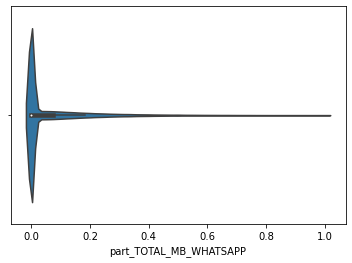

In [370]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['part_TOTAL_MB_WHATSAPP']);
#tabla_1['part_TOTAL_MB_WHATSAPP']

### Union final

In [380]:
tablaFinal=pd.merge(tabla_1, tabla_razones, left_index=True, right_index=True)

In [381]:
#tabla_1[tabla_1['res_ACTIVACION']==2].filter(regex='ACTIVACION',axis=1)

## ELIMINAR COLUMNAS

In [382]:
tablaFinal.columns.values

array(['file', 'IDENTIFICACION', 'POROUT', 'REGION_SIT', 'MUNICIPIO_SIT',
       'DEPTO_SIT', 'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE',
       'DEPTO_SIT_NOCHE', 'REGION_SIT_M1', 'MUNICIPIO_SIT_M1',
       'DEPTO_SIT_M1', 'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1',
       'DEPTO_SIT_NOCHE_M1', 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1',
       'PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
       'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3',
       'PROM_DATOS_M4', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS',
       'CONSUMO_TOTAL_MB', 'CANT_PAQ_MAS_COMPRADO_MES',
       'VLR_PAQ_MAS_COMPRADO_MES', 'NOMBRE_PAQ_MAS_COMPRADO_MES',
       'PROMEDIO_SALDO_MES', 'PROMEDIO_SALDO_M1', 'PROMEDIO_SALDO_M2',
       'ANTIGUEDAD_USUARIO', 'TOTAL_VALOR_DE_ADELANTA_SALDO',
       'ES_SMARTPHONE', 'CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR',
       'VLR_PAQ_MAS_COM

In [383]:
colEliminar=['file','PROM_SEGUNDOS_MA','PROM_SEGUNDOS_M1','PROM_SEGUNDOS_M2','PROM_SEGUNDOS_M3','PROM_SEGUNDOS_M4','PROM_DATOS_MA','PROM_DATOS_M1','PROM_DATOS_M2','PROM_DATOS_M3','PROM_DATOS_M4',
            'NOMBRE_PAQ_MAS_COMPRADO_MES', 'PROMEDIO_SALDO_MES','PROMEDIO_SALDO_M1','PROMEDIO_SALDO_M2','NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR',
             'REGION_SIT','MUNICIPIO_SIT','DEPTO_SIT','REGION_SIT_NOCHE','MUNICIPIO_SIT_NOCHE','DEPTO_SIT_NOCHE','REGION_SIT_M1','MUNICIPIO_SIT_M1',
             'DEPTO_SIT_M1','REGION_SIT_NOCHE_M1','MUNICIPIO_SIT_NOCHE_M1','DEPTO_SIT_NOCHE_M1',
             'RAZON1_MA','RAZON1_M1','RAZON2_M2','RAZON3_M3','RAZON3_M4',
            'sim_RAZON1_MA','sim_RAZON1_M1','sim_RAZON2_M2','sim_RAZON3_M3','sim_RAZON3_M4',
             'DESACTIVACION_PORTACION_M1', 'DESACTIVACION_PORTACION_M2', 'DESACTIVACION_PORTACION_M3', 'DESACTIVACION_PORTACION_M4', 
             'ACTIVACION_PORTACION_M1', 'ACTIVACION_PORTACION_M2', 'ACTIVACION_PORTACION_M3', 'ACTIVACION_PORTACION_M4',
             'razon_sinRazon', 'res_ACTIVACION','res_DESACTIVACION','t_Depto','t_Mun','t_Region',
             
             'VLR_PAQ_MAS_COMPRADO_MES','VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR',
             'CANT_PAQ_MAS_COMPRADO_MES','CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR'
            ]

In [384]:
len(colEliminar)

52

In [385]:
tablaFinal.drop(columns=colEliminar, inplace=True)

In [386]:
tablaFinal.columns.values

array(['IDENTIFICACION', 'POROUT', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS',
       'CONSUMO_TOTAL_MB', 'CANT_PAQ_MAS_COMPRADO_MES',
       'VLR_PAQ_MAS_COMPRADO_MES', 'ANTIGUEDAD_USUARIO',
       'TOTAL_VALOR_DE_ADELANTA_SALDO', 'ES_SMARTPHONE',
       'CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR',
       'VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR', 'ACTIGUEDAD_ACT_BSCS',
       'avg_PROM_SEGUNDOS', 'STD_PROM_SEGUNDOS', 'STD_cat_PROM_SEGUNDOS',
       'STD_cat2_PROM_SEGUNDOS', 'slope_PROM_SEGUNDOS',
       'slope_cat_PROM_SEGUNDOS', 'slope_cat2_PROM_SEGUNDOS',
       'avg_PROM_DATOS', 'STD_PROM_DATOS', 'STD_cat_PROM_DATOS',
       'STD_cat2_PROM_DATOS', 'slope_PROM_DATOS', 'slope_cat_PROM_DATOS',
       'slope_cat2_PROM_DATOS', 'avg_PROMEDIO_SALDO',
       'STD_PROMEDIO_SALDO', 'STD_cat_PROMEDIO_SALDO',
       'STD_cat2_PROMEDIO_SALDO', 'slope_PROMEDIO_SALDO',
       'slope_cat_PROMEDIO_SALDO

In [387]:
tablaFinal.sample(10)

,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS
CO_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
204722739,28023749.000,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,1864.000,0.000,0.000,0.000,0.000,2114,674.038,158.238,0.235,moderate,99.703,0.148,increase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354.452,501.270,1.414,dispersed,708.903,2.000,increase,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinCambio,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NorOccidente,Risaralda,Pereira,0,0,0,0,0,0,0,0,0,0
216320499,98514800.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1659.000,0.000,1.000,0.000,0.000,1796,363.861,194.667,0.535,dispersed,90.987,0.250,increase,1054.959,191.840,0.182,united,-25.476,-0.024,noTrend,1337.446,257.998,0.193,united,72.258,0.054,noTrend,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinCambio,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,Costa,Cesar,Chimichagua,0,0,0,0,0,0,0,0,0,0
219144425,72178050.000,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,1753,112.320,51.500,0.459,dispersed,24.034,0.214,increase,1423794.012,1239045.989,0.870,moderate,-1149928.378,-0.808,decrease,1.190,0.000,0.000,united,0.000,0.000,noTrend,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinCambio,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
248452293,6032023.000,0,-1.0

### Ordenar Columnas

In [ ]:
## validar variable IDENTIFICACION

In [388]:
# Manejo de nullos
varCatListas=['tipo_ACT','t_viajero','STD_cat2_PROMEDIO_SALDO','STD_cat2_PROM_SEGUNDOS','STD_cat2_PROM_DATOS','slope_cat2_PROMEDIO_SALDO',
              'slope_cat2_PROM_SEGUNDOS','slope_cat2_PROM_DATOS','res_Region','res_Mun','res_Depto']
varCatTrans=['razon_VOZ Y DATOS','razon_SERVICIO','razon_PQR','razon_PAGO','razon_INFORMACION',
             'razon_FACTURACION','razon_EQUIPO','razon_COMERCIAL','razon_COBRO','razon_CANCELACION',
             'POROUT','paq_youtube','paq_wtf','paq_ws','paq_waze','paq_twitter','paq_todoIncluido','paq_suscripcion',
             'paq_speedy','paq_snapchat','paq_sms','paq_sinpaquete','paq_pasatiempo','paq_minutos','paq_migracion',
             'paq_LargaDistancia','paq_Instagram','paq_facebook','paq_empresas','paq_datos','ES_SMARTPHONE']
varNumericas=['VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR','VLR_PAQ_MAS_COMPRADO_MES','TOTAL_VALOR_DE_ADELANTA_SALDO',
              'TOTAL_MB_YOUTUBE','TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK','TOTAL_MB_SNAPCHAT','TOTAL_MB_INSTAGRAM',
              'TOTAL_MB_GOOGLE_MAPS','STD_PROMEDIO_SALDO','STD_PROM_SEGUNDOS','STD_PROM_DATOS','STD_cat_PROMEDIO_SALDO',
              'STD_cat_PROM_SEGUNDOS','STD_cat_PROM_DATOS','slope_PROMEDIO_SALDO','slope_PROM_SEGUNDOS','slope_PROM_DATOS',
              'slope_cat_PROMEDIO_SALDO','slope_cat_PROM_SEGUNDOS','slope_cat_PROM_DATOS','part_TOTAL_MB_YOUTUBE',
              'part_TOTAL_MB_WHATSAPP','part_TOTAL_MB_TWITTER_Y_FACEBOOK','part_TOTAL_MB_SNAPCHAT','part_TOTAL_MB_INSTAGRAM',
              'part_TOTAL_MB_GOOGLE_MAPS','paq_youtube_v','paq_youtube_q','paq_wtf_v','paq_wtf_q','paq_ws_v','paq_ws_q',
              'paq_waze_v','paq_waze_q','paq_twitter_v','paq_twitter_q','paq_todoIncluido_v','paq_todoIncluido_q',
              'paq_suscripcion_v','paq_suscripcion_q','paq_speedy_v','paq_speedy_q','paq_snapchat_v','paq_snapchat_q',
              'paq_sms_v','paq_sms_q','paq_sinpaquete_v','paq_sinpaquete_q','paq_pasatiempo_v','paq_pasatiempo_q','paq_minutos_v',
              'paq_minutos_q','paq_migracion_v','paq_migracion_q','paq_LargaDistancia_v','paq_LargaDistancia_q','paq_Instagram_v',
              'paq_Instagram_q','paq_facebook_v','paq_facebook_q','paq_empresas_v','paq_empresas_q','paq_datos_v','paq_datos_q',
              'CONSUMO_TOTAL_MB','CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR','CANT_PAQ_MAS_COMPRADO_MES','avg_PROMEDIO_SALDO',
              'avg_PROM_SEGUNDOS','avg_PROM_DATOS','ANTIGUEDAD_USUARIO','ACTIGUEDAD_ACT_BSCS']

In [389]:
tablaFinal.to_csv('tabla1_cp4.csv')

In [5]:
tablaFinal=pd.read_csv('tabla1_cp4.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


###  Edad de los usuarios

### Cargar Modelos

In [7]:
modelo_H1=load(f'11.Edad/modeloXGB_H1.pkl')
modelo_H2=load(f'11.Edad/modeloXGB_H2.pkl')
modelo_M1=load(f'11.Edad/modeloXGB_M1.pkl')
modelo_act2004=load(f'11.Edad/modeloXGB_act2004.pkl')

In [8]:
##Preparar datos para los modelos
cedulas=tablaFinal[['IDENTIFICACION']]

In [9]:
cedulas.head(2)

,IDENTIFICACION
0,41939455.000
1,51832393.000


In [10]:
cedulas.dtypes

IDENTIFICACION    object
dtype: object

In [71]:
texto="holam"
texto[-2:]

'am'

In [72]:
texto[:-2]

'hol'

In [73]:
def limpiarIdentificacion(dni):
    #print(type(dni))
    #print(isinstance(dni, float))
    if not isinstance(dni, float):
        if any( (c.isalpha()) for c in dni):
            return 0
        else:
            if dni[-2:] == '.0':
                dni=dni[:-2]
            dni=str(dni).replace('.000','')
            dni = re.sub(r'\W', ' ', str(dni))
            dni=dni.replace('.','')
            dni=dni.replace(' ','')
    return int(dni)

In [74]:
cedulas['id_limp']=cedulas['IDENTIFICACION'].apply(limpiarIdentificacion)

<ipython-input-74-5a2be77d3d9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedulas['id_limp']=cedulas['IDENTIFICACION'].apply(limpiarIdentificacion)


In [75]:
cedulas.head(10)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id
0,41939455.000,41939455,8,419,M1
1,51832393.000,51832393,8,518,M1
2,19383515.000,19383515,8,193,H1
3,52427533.000,52427533,8,524,M1
4,79556158.000,79556158,8,795,H2
5,63449651.000,63449651,8,634,M1
6,31867209.000,31867209,8,318,M1
7,11255825.000,11255825,8,112,H1
8,51880748.000,51880748,8,518,M1
9,66953389.000,66953389,8,669,M1


In [52]:
#cedulas['id_limp']=cedulas['id_limp'].astype('int64')

In [76]:
#cedulas['longitud']=cedulas['id_limp'].str.len()
cedulas['longitud']=cedulas['id_limp'].map(str).apply(len)

<ipython-input-76-683cd19976c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedulas['longitud']=cedulas['id_limp'].map(str).apply(len)


In [77]:
cedulas.sample(10)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id
137882,42151133.000,42151133,8,421,M1
271052,12170294.000,12170294,8,121,H1
711447,1084866796.000,1084866796,10,108,act2004
173464,1023970214.000,1023970214,10,102,act2004
632248,1111798468.000,1111798468,10,111,act2004
719258,1032376501.000,1032376501,10,103,act2004
791527,1118837963.000,1118837963,10,111,act2004
385588,60322829.000,60322829,8,603,M1
114114,24604514.000,24604514,8,246,M1
6944,94369634.000,94369634,8,943,H2


In [78]:
cedulas['longitud'].value_counts()

8     517624
10    262113
7      68581
1          2
6          1
Name: longitud, dtype: int64

In [79]:
cedulas[cedulas['id_limp']==0]

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id
300361,VALBUENA,0,1,0,rev
311585,BUITRAGO,0,1,0,rev


In [80]:
#cedulas['num_ini']=cedulas['id_limp'].str[:3]
cedulas['num_ini']=cedulas['id_limp'].map(str).str[:3]

<ipython-input-80-652b285350d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedulas['num_ini']=cedulas['id_limp'].map(str).str[:3]


In [81]:
cedulas.sample(10)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id
755671,90042719.000,90042719,8,900,H2
373479,1083454851.000,1083454851,10,108,act2004
343818,22393831.000,22393831,8,223,M1
102359,79170668.000,79170668,8,791,H2
222329,52356987.000,52356987,8,523,M1
512110,37752552.000,37752552,8,377,M1
799163,1093735475.000,1093735475,10,109,act2004
188888,1039682820.000,1039682820,10,103,act2004
149739,16947077.000,16947077,8,169,H1
749448,19331748.000,19331748,8,193,H1


#### Separación tipo cedula

In [82]:
cedulas['cat_id']=np.where(
                            cedulas['longitud']==1,'rev',np.where(
                                cedulas['longitud']==10,'act2004', np.where(
                                    cedulas['id_limp']<20000000,'H1', np.where(
                                        cedulas['id_limp']<70000000,'M1', np.where(
                                            cedulas['id_limp']<100000000,'H2','rev')
                                        )
                                    )
                            )
                )

<ipython-input-82-dc845ece0326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedulas['cat_id']=np.where(


In [83]:
cedulas.sample(10)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id
664732,53911498.000,53911498,8,539,M1
55107,1047386208.000,1047386208,10,104,act2004
67958,6461657.000,6461657,7,646,H1
657587,1022419363.000,1022419363,10,102,act2004
828971,43454892.000,43454892,8,434,M1
63186,14653210.000,14653210,8,146,H1
495087,10660423.000,10660423,8,106,H1
304397,26734491.000,26734491,8,267,M1
131630,79170668.000,79170668,8,791,H2
475784,5391869.000,5391869,7,539,H1


In [84]:
cedulas['cat_id'].value_counts()

act2004    262113
M1         227483
H2         197127
H1         161596
rev             2
Name: cat_id, dtype: int64

In [85]:
cedulas[cedulas['cat_id']=='rev'].head(2)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id
300361,VALBUENA,0,1,0,rev
311585,BUITRAGO,0,1,0,rev


In [87]:
df_H1=cedulas[cedulas['cat_id']=='H1']
df_H2=cedulas[cedulas['cat_id']=='H2']
df_M1=cedulas[cedulas['cat_id']=='M1']
df_act2004=cedulas[cedulas['cat_id']=='act2004']
#modelo_act2004.predict(data)

In [93]:
df_H1['EDAD']=modelo_H1.predict(df_H1[['id_limp','longitud','num_ini']])
df_H2['EDAD']=modelo_H2.predict(df_H2[['id_limp','longitud','num_ini']])
df_M1['EDAD']=modelo_M1.predict(df_M1[['id_limp','longitud','num_ini']])
df_act2004['EDAD']=modelo_act2004.predict(df_act2004[['id_limp','longitud','num_ini']])

<ipython-input-93-f523cf026fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H1['EDAD']=modelo_H1.predict(df_H1[['id_limp','longitud','num_ini']])
<ipython-input-93-f523cf026fcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H2['EDAD']=modelo_H2.predict(df_H2[['id_limp','longitud','num_ini']])
<ipython-input-93-f523cf026fcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [96]:
df_act2004.sample(10)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id,EDAD
756604,1020399602.000,1020399602,10,102,act2004,34.438
362071,1090458813.000,1090458813,10,109,act2004,28.391
636648,1024501270.000,1024501270,10,102,act2004,31.145
488981,1053849791.000,1053849791,10,105,act2004,24.849
94531,1022989279.000,1022989279,10,102,act2004,27.144
176687,1118542399.000,1118542399,10,111,act2004,31.447
308255,1044670312.000,1044670312,10,104,act2004,27.322
544371,1014271121.000,1014271121,10,101,act2004,25.687
170333,1075248376.000,1075248376,10,107,act2004,30.394
30419,1069898528.000,1069898528,10,106,act2004,32.328


In [97]:
df_cedulaFinal=df_H1.copy()
df_cedulaFinal=df_cedulaFinal.append(df_H2)
df_cedulaFinal=df_cedulaFinal.append(df_M1)
df_cedulaFinal=df_cedulaFinal.append(df_act2004)

In [98]:
len(df_cedulaFinal)

848319

In [100]:
df_cedulaFinal=df_cedulaFinal.drop_duplicates()

In [101]:
len(df_cedulaFinal)

194999

In [99]:
del df_H1
del df_H2
del df_M1
del df_act2004
gc.collect()

231

In [153]:
#lef join Edad

In [158]:
df_cedulaFinal.head(2)

,IDENTIFICACION,id_limp,longitud,num_ini,cat_id,EDAD,Gen
2,19383515.000,19383515,8,193,H1,61.881,H
7,11255825.000,11255825,8,112,H1,40.325,H


In [157]:
df_cedulaFinal['Gen']=df_cedulaFinal['cat_id'].str[0]

In [159]:
df_cedulaFinal[['IDENTIFICACION','EDAD','Gen']].head(2)

,IDENTIFICACION,EDAD,Gen
2,19383515.000,61.881,H
7,11255825.000,40.325,H


In [162]:
tablaFinal.head(2)

,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen
0,7045723,41939455.000,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,43.432,M
1,7153200,51832393.000,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,54.792,M


In [161]:
tablaFinal=tablaFinal.merge(df_cedulaFinal[['IDENTIFICACION','EDAD','Gen']],left_on='IDENTIFICACION', right_on='IDENTIFICACION', how='left')

### Cedulas repetidas

In [102]:
cedulas=tablaFinal[['IDENTIFICACION']]

In [103]:
resCedulas=cedulas['IDENTIFICACION'].value_counts().to_frame()

In [125]:
resCedulas.reset_index(inplace=True)

In [126]:
resCedulas.head(5)

,index,IDENTIFICACION
0,90042719.000,28114
1,79170668.000,22064
2,19295300.000,16858
3,71314521.000,15972
4,90801837.000,10348


In [127]:
resCedulas.columns=['IDENTIFICACION','count']

In [167]:
resCedulas['selContID']=np.where(resCedulas['count']<=5,'val','noval')

In [168]:
resCedulas[['IDENTIFICACION','selContID']].head(2)

,IDENTIFICACION,selContID
0,90042719.000,noval
1,79170668.000,noval


In [149]:
resCedulas.head(5)

,IDENTIFICACION,count,cat
0,90042719.000,28114,>10001
1,79170668.000,22064,>10001
2,19295300.000,16858,>10001
3,71314521.000,15972,>10001
4,90801837.000,10348,>10001


In [169]:
tablaFinal=tablaFinal.merge(resCedulas[['IDENTIFICACION','selContID']],left_on='IDENTIFICACION', right_on='IDENTIFICACION', how='left')

In [170]:
tablaFinal.to_csv('tabla1_cp5.csv')
#tablaFinal=pd.read_csv('tabla1_cp4.csv')

In [147]:
def binningCantCed(cant):
    respuesta=0
    if cant<=5:
        respuesta=str(cant)
    elif cant<=10:
        respuesta='6-10'
    elif cant<=20:
        respuesta='11-20'
    elif cant<=50:
        respuesta='21-50'
    elif cant<=100:
        respuesta='51-100'
    elif cant<=500:
        respuesta='101-500'
    elif cant<=1000:
        respuesta='501-1000'
    elif cant<=1000:
        respuesta='501-1000'
    elif cant<=10000:
        respuesta='1001-10000'
    else:
        respuesta='>10001'
    return respuesta    

In [148]:
resCedulas['cat']=resCedulas['count'].apply(binningCantCed)

In [152]:
resCedulas['cat'].value_counts().to_frame()

,cat
1,157751
2,21879
3,5785
4,2328
6-10,2056
11-20,1403
21-50,1274
5,1150
101-500,675
51-100,501


In [12]:
cedulas=cedulas.drop_duplicates()

In [13]:
len(cedulas)

195001

In [14]:
tablaFinal.to_csv('cedulas.csv')

In [395]:
cedulas=cedulas.drop_duplicates()

In [396]:
len(cedulas)

195001

In [27]:
tablaFinal.sample(10)

,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS
473176,300658592,16550624.000,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,606,79.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
337326,268075466,13471295.000,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,1027,181.556,77.450,0.427,dispersed,11.968,0.066,noTrend,137634.418,83713.001,0.608,moderate,118388.061,0.860,increase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
415432,281364464,1017254249.000,0,79.000,249.000,0.000,28.000,72.000,0.000,852.000,0.000,0.000,768.000,0.000,1.000,0.000,0.000,849,128.837,42.530,0.330,moderate,-17.416,-0.135,decrease,6079585.884,NaN,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.093,0.292,0.000,0.033,0.085,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
399726,279706955,1193643011.000,1,5815.000,3739.000,29.000,0.000,1560.000,27.000,14595.000,8.000,-8000.000,839.000,0.000,1.000,5.000,-5000.000,870,178.127,73.111,0.410,moderate,9.129,0.051,noTrend,6015569.720,8072904.667,1.342,dispersed,5147684.692,0.856,increase,456.874,

###  Hasta aquí, preprocesamiento y estado de las identificaciones
## Se sugiere hacer 2 ejercicios
* Descriptivo con id tipo cedula
* Un muestreo Total
 * De cada uno
  * Tablas de proporcion por variables categoricas y gráficos. Opción Power BI  
  * Cluster y perfilamiento

### Manejo de Nullos

In [28]:
tablaFinal['t_viajero'].isnull().sum()

0

In [29]:
tablaFinal['t_viajero'].value_counts()

sinCambio      428686
sinInfo        370441
interMun        33031
interRegion      9911
interDepto       6252
Name: t_viajero, dtype: int64

### Categorizacion

In [48]:
tablaFinal['POROUT']=np.where(tablaFinal['POROUT']==1,'SI','NO')

## Tablas y gráficos de comparación

###  grafico 1.   Portout

In [49]:
tablaFinal['POROUT'].value_counts()/len(tablaFinal)

NO   0.763
SI   0.237
Name: POROUT, dtype: float64

In [50]:
res1=tablaFinal['POROUT'].value_counts().to_frame()
res1.reset_index(inplace=True)

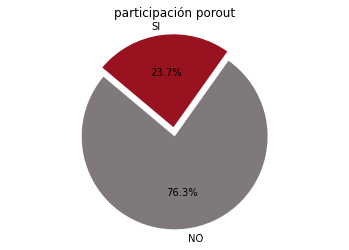

In [51]:
colors =['#80797c','#981220']
explode =(0.1,0)
plt.pie(res1['POROUT'], explode=explode, labels=res1['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('participación porout')
plt.axis('equal')
plt.show()

In [52]:
#t_viajero
res_t_viajero=tablaFinal.groupby(['POROUT','t_viajero']).agg({'CO_ID':'count'}).rename(columns={'CO_ID':'Total'}).reset_index().sort_values('Total',ascending=False)
#res_t_viajero=res_t_viajero.replace

In [56]:
res_t_viajero.set_index(['t_viajero'])

,POROUT,Total
t_viajero,,
sinInfo,NO,347772
sinCambio,NO,269177
sinCambio,SI,159509
sinInfo,SI,22669
interMun,NO,20721
interMun,SI,12310
interRegion,NO,5133
interRegion,SI,4778
interDepto,NO,4244


In [58]:
df_pivot = pd.pivot_table(
    res_t_viajero,
    values="Total",
    index="t_viajero",
    columns="POROUT",
    aggfunc=sum
)

In [59]:
df_pivot

POROUT,NO,SI
t_viajero,,
interDepto,4244,2008
interMun,20721,12310
interRegion,5133,4778
sinCambio,269177,159509
sinInfo,347772,22669


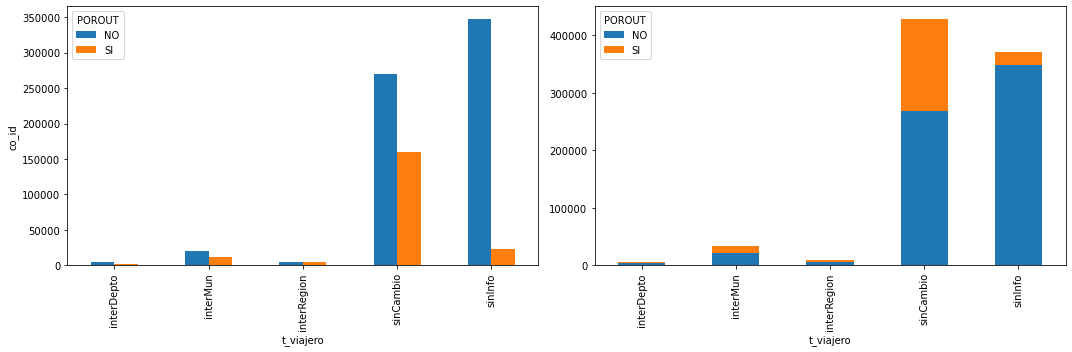

In [70]:
# Plot a bar chart using the DF
fig, ax = plt.subplots(1,2, figsize=(15,5))
#sns.violinplot(ax=ax,x=tabla_1['STD_PROM_DATOS']);
#fig = ax.get_figure()
df_pivot.plot(kind="bar", ax=ax[0])
df_pivot.plot(kind="bar",stacked=True, ax=ax[1])
ax[0].set_xlabel("t_viajero")
ax[0].set_ylabel("co_id")
plt.tight_layout()
plt.show()
#fig.set_size_inches(7, 6);

In [ ]:
# importing packages
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
  
# load dataset
#df = pd.read_excel("Hours.xlsx")
  
# view dataset
#print(df)
  
# plot a Stacked Bar Chart using matplotlib
df.plot(
  x = 'Name', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)
  
df_total = df["Studied"] + df["Slept"] + df["Other"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

###  Recortes

In [210]:
colMostrar=list(tabla_1.filter(regex='^paq_',axis=1).columns.values)

In [211]:
colMostrar

['paq_datos',
 'paq_empresas',
 'paq_facebook',
 'paq_Instagram',
 'paq_LargaDistancia',
 'paq_migracion',
 'paq_minutos',
 'paq_pasatiempo',
 'paq_sinpaquete',
 'paq_sms',
 'paq_snapchat',
 'paq_speedy',
 'paq_suscripcion',
 'paq_todoIncluido',
 'paq_twitter',
 'paq_waze',
 'paq_ws',
 'paq_wtf',
 'paq_youtube']

In [204]:
colMostrar2=['NOMBRE_PAQ_MAS_COMPRADO_MES','NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR']

In [213]:
colMostrar.extend(colMostrar2)

In [134]:
textToken_MA=[]
i=0
for text in nomPaquetes_ma:   
    #print(text)    
    #text = re.sub(r'+', ' ', str(text))
    text = text.replace('+', ' ')
    text = text.replace(',', ' ')
    text = text.replace('.', ' ')
    # Sustituir los espacios en blanco en uno solo
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\d', ' ', str(text))
    text = text.lower()
    textToken_MA=textToken+re.split(' ',text)    
    #print(text)
    i=i+1

In [135]:
textToken_MA= list(dict.fromkeys(textToken_MA))

In [136]:
textToken_MA

['sinpaquete',
 'navegacion',
 '',
 'mb',
 'chatwhatsapp',
 'facebook',
 'twitter',
 'por',
 'horas',
 'dia',
 'cobro',
 'servicio',
 'contenido',
 'speedy',
 'paquetes',
 'minutos',
 'migracion',
 'datos',
 'wa',
 'vig',
 'wtf',
 'dias',
 'paquete',
 'de',
 'chat',
 'whatsapp',
 'todo',
 'incluido',
 'voz',
 'ilimitados',
 'min',
 'sms',
 'gb',
 'rec',
 'youtube',
 'hora',
 'tat',
 'y',
 'pqm',
 'ldi',
 'venezuela',
 'navegaciã³n',
 'ilimitada',
 '$',
 'con',
 'suscripcion',
 'usacanprmex',
 'waze',
 'compra',
 'mensajes',
 'texto',
 'en',
 'plataforma',
 'prepago',
 'sinfronteras',
 'instagram',
 'para',
 'td',
 'demanda',
 'recarga',
 'pasatiempo',
 'pre-pre',
 'mas',
 'adicional',
 'snapchat',
 'horastat',
 'preferencial',
 'recurrente',
 'adicionales',
 'paq',
 'empresas']

#### Promedio

In [79]:
tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).head()

,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,231.667,NaN
2,655.926,341.348,318.590,299.633,NaN
3,380.500,233.800,621.250,NaN,NaN
4,438.707,518.259,378.987,300.661,339.817


In [80]:
tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).iloc[4]

PROM_SEGUNDOS_MA   438.707
PROM_SEGUNDOS_M1   518.259
PROM_SEGUNDOS_M2   378.987
PROM_SEGUNDOS_M3   300.661
PROM_SEGUNDOS_M4   339.817
Name: 4, dtype: float64

In [81]:
#tabla_1.iloc[4]

In [82]:
tabla_1['avg_PROM_SEGUNDOS']=tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).mean(axis=1)

In [83]:
tabla_1['avg_PROM_SEGUNDOS'].head()

0       NaN
1   231.667
2   403.874
3   411.850
4   395.286
Name: avg_PROM_SEGUNDOS, dtype: float64

In [84]:
#PROM_DATOS
tabla_1.filter(regex='^PROM_DATOS',axis=1).head(20)

,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4
0,NaN,NaN,NaN,NaN,NaN
1,25662.357,5325.175,0.000,4789059.524,NaN
2,2884460.709,8.552,318952.160,8170.538,NaN
3,381114.714,NaN,NaN,NaN,NaN
4,18618.000,5489566.600,21644303.447,135.000,29484.400
5,95912.306,395327.725,222666.115,34335.921,632445.873
6,7428231.786,7219155.095,2064861.762,2244865.745,NaN
7,NaN,NaN,NaN,NaN,NaN
8,28.895,117.861,743.803,2555.178,980.150
9,15080547.186,14775407.700,6731867.269,7218381.094,NaN


In [85]:
tabla_1['avg_PROM_DATOS']=tabla_1.filter(regex='^PROM_DATOS',axis=1).mean(axis=1)

In [86]:
tabla_1['avg_PROM_DATOS'].head()

0           NaN
1   1205011.764
2    802897.989
3    381114.714
4   5436421.489
Name: avg_PROM_DATOS, dtype: float64

In [87]:
tabla_1.filter(regex='^PROMEDIO_SALDO',axis=1).head(15)

,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2
0,NaN,NaN,NaN
1,NaN,2258.065,NaN
2,1208.233,3097.539,10470.967
3,0.000,NaN,NaN
4,3918.053,12444.077,12279.255
5,469.132,1343.133,6694.842
6,4.170,4.170,4.170
7,2842.074,2997.405,2237.180
8,9115.787,28913.377,20195.491
9,1336.263,6454.543,669.597


In [88]:
tabla_1['avg_PROMEDIO_SALDO']=tabla_1.filter(regex='^PROMEDIO_SALDO',axis=1).mean(axis=1)

In [89]:
tabla_1['avg_PROMEDIO_SALDO'].head()

0        NaN
1   2258.065
2   4925.580
3      0.000
4   9547.128
Name: avg_PROMEDIO_SALDO, dtype: float64

### STD

In [121]:
def categorizacion_std(x):
    corte_up=0.5    
    if ( np.isnan(x) ):
        return np.NAN
    elif(x>corte_up):
        return "dispersed"   
    else:
        return "united"

In [133]:
def categorizacion_std2(x, q1=0.2 , q2=0.5):
    corte_up=0.5    
    if ( np.isnan(x) ):
        return np.NAN
    elif(x>q2):
        return "dispersed"   
    elif(x>q1):
        return "moderate"
    else:
        return "united"

In [107]:
#df.std(axis=1)
tabla_1['STD_PROM_DATOS']=tabla_1.filter(regex='^PROM_DATOS',axis=1).std(axis=1)

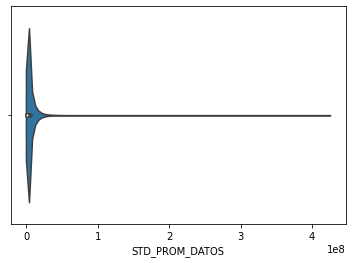

In [110]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['STD_PROM_DATOS']);
#ax.set_xlim(-1000,1000)

In [112]:
tabla_1['STD_PROM_DATOS_cat']=tabla_1['STD_PROM_DATOS']/tabla_1['avg_PROM_DATOS']

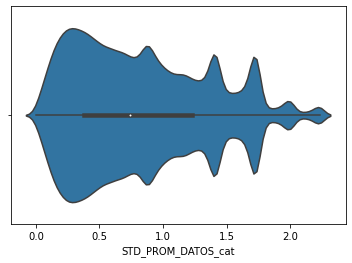

In [113]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['STD_PROM_DATOS_cat']);

In [148]:
q1=tabla_1['STD_PROM_DATOS_cat'].quantile(0.33)
q2=tabla_1['STD_PROM_DATOS_cat'].quantile(0.66)

In [149]:
tabla_1['STD_PROM_DATOS_cat2']=tabla_1['STD_PROM_DATOS_cat'].apply(categorizacion_std2,q1=q1, q2=q2)

In [150]:
tabla_1['STD_PROM_DATOS_cat2'].isnull().sum()

393637

In [151]:
tabla_1['STD_PROM_DATOS_cat2'].value_counts()

dispersed    154593
united       150046
moderate     150045
Name: STD_PROM_DATOS_cat2, dtype: int64

In [125]:
tabla_1['STD_PROM_SEGUNDOS']=tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).std(axis=1)

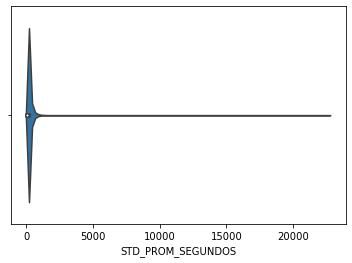

In [126]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['STD_PROM_SEGUNDOS']);

In [127]:
tabla_1['STD_PROM_SEGUNDOS_cat']=tabla_1['STD_PROM_SEGUNDOS']/tabla_1['avg_PROM_SEGUNDOS']

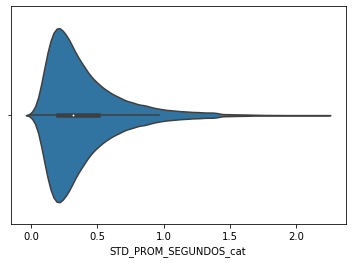

In [129]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['STD_PROM_SEGUNDOS_cat']);

In [136]:
q1=tabla_1['STD_PROM_SEGUNDOS_cat'].quantile(0.33)
q2=tabla_1['STD_PROM_SEGUNDOS_cat'].quantile(0.66)

In [140]:
tabla_1['STD_PROM_SEGUNDOS_cat2']=tabla_1['STD_PROM_SEGUNDOS_cat'].apply(categorizacion_std2, q1=q1, q2=q2)

In [131]:
tabla_1['STD_PROM_SEGUNDOS_cat2'].isnull().sum()

264688

In [141]:
tabla_1['STD_PROM_SEGUNDOS_cat2'].value_counts()

dispersed    198435
united       192599
moderate     192599
Name: STD_PROM_SEGUNDOS_cat2, dtype: int64

In [ ]:
#tabla_1['slope_PROM_SEGUNDOS_cat']=tabla_1['slope_PROM_SEGUNDOS']/tabla_1['avg_PROM_SEGUNDOS']
#tabla_1['STD_PROM_DATOS_cat']

In [152]:
#PROMEDIO_SALDO

In [153]:
tabla_1['STD_PROMEDIO_SALDO']=tabla_1.filter(regex='^PROMEDIO_SALDO',axis=1).std(axis=1)

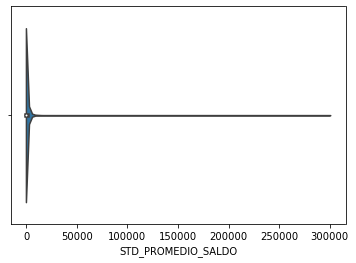

In [155]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['STD_PROMEDIO_SALDO']);

In [156]:
tabla_1['STD_PROMEDIO_SALDO_cat']=tabla_1['STD_PROMEDIO_SALDO']/tabla_1['avg_PROMEDIO_SALDO']

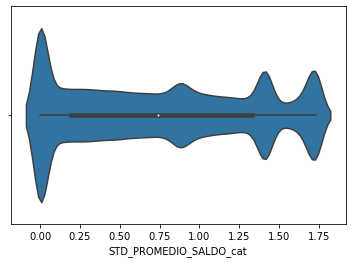

In [157]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['STD_PROMEDIO_SALDO_cat']);

In [158]:
q1=tabla_1['STD_PROMEDIO_SALDO_cat'].quantile(0.33)
q2=tabla_1['STD_PROMEDIO_SALDO_cat'].quantile(0.66)

In [162]:
tabla_1['STD_PROMEDIO_SALDO_cat2']=tabla_1['STD_PROMEDIO_SALDO_cat'].apply(categorizacion_std2, q1=q1, q2=q2)

In [163]:
tabla_1['STD_PROMEDIO_SALDO_cat2'].isnull().sum()

433172

In [164]:
tabla_1['STD_PROMEDIO_SALDO_cat2'].value_counts()

dispersed    141151
united       136999
moderate     136999
Name: STD_PROMEDIO_SALDO_cat2, dtype: int64

### Tendencia

In [90]:
## Tendencia
def calcSlope(data, order=1):
    ind= list(reversed(range(0,len(data))))
    #print(ind)
    #print(data)
    #print(np.isfinite(data))
    idx=np.isfinite(ind) & np.isfinite(data)
    if idx.sum()<=1 :
        return np.NAN
    else:
        #print(list(compress(ind, idx)))
        ind=list(compress(ind, idx))
        data=list(compress(data, idx))
        coeffs = np.polyfit(ind, data, order)
        slope = coeffs[-2]
        return float(slope)

In [91]:
def calcSlopeRow(row,prefix):
    ##data=row.filter(regex='^'+prefix,axis=1).values    
    data=list(row.filter(regex='^'+prefix).values)
    ##return calcSlope(data[0])
    if(data.count('Nan')==len(data)):
        return np.NAN
    else:
        return calcSlope(data)

In [92]:
#tweetsDFProcesado['tokens']=tweetsDFProcesado.apply(lambda x: seleccionTokenizacion(x,'full_text_Limpio'), axis=1)

In [93]:
#tabla_1['slope_PROM_SEGUNDOS']=tabla_1.filter(regex='^PROM_DATOS',axis=1).mean(axis=1)
tabla_1['slope_PROM_SEGUNDOS']=tabla_1.apply(lambda x: calcSlopeRow(x,'PROM_SEGUNDOS'), axis=1)

In [94]:
len(tabla_1)

848321

In [95]:
tabla_1['slope_PROM_SEGUNDOS'].isnull().sum()

264686

In [96]:
#tabla_1['slope_PROM_SEGUNDOS'].describe

(-1000.0, 1000.0)

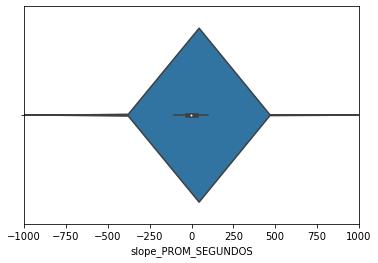

In [97]:
#sns.violinplot(ax=axs[0],x=df_serie["PORCENTAJEPL"]);
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_SEGUNDOS']);
ax.set_xlim(-1000,1000)

In [98]:
tabla_1['slope_PROM_SEGUNDOS_cat']=tabla_1['slope_PROM_SEGUNDOS']/tabla_1['avg_PROM_SEGUNDOS']

In [99]:
tabla_1[['slope_PROM_SEGUNDOS_cat']].describe()

,slope_PROM_SEGUNDOS_cat
count,583633.000
mean,-0.010
std,0.297
min,-2.000
25%,-0.111
50%,-0.005
75%,0.099
max,2.000


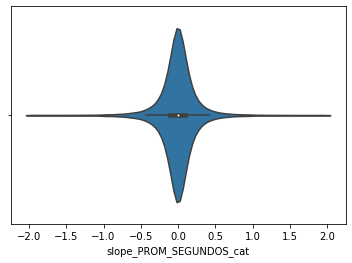

In [100]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_SEGUNDOS_cat']);

In [101]:
def categorizacion(x):
    corte_up=0.1
    corte_dw=-0.1
    if ( np.isnan(x) ):
        return np.NAN
    elif(x>corte_up):
        return "increase"
    elif(x<corte_dw):
        return "decrease"
    else:
        return "noTrend"

In [102]:
tabla_1['slope_PROM_SEGUNDOS_cat2']=tabla_1['slope_PROM_SEGUNDOS_cat'].apply(categorizacion)

In [103]:
tabla_1['slope_PROM_SEGUNDOS_cat2'].isnull().sum()

264688

In [104]:
tabla_1['slope_PROM_SEGUNDOS_cat2'].value_counts()

noTrend     281098
decrease    157872
increase    144663
Name: slope_PROM_SEGUNDOS_cat2, dtype: int64

In [105]:
tabla_1.iloc[[0,4,10]]

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,avg_PROM_DATOS,avg_PROMEDIO_SALDO,slope_PROM_SEGUNDOS,slope_PROM_SEGUNDOS_cat,slope_PROM_SEGUNDOS_cat2
0,7045723,df05,41939455,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605,NaN,NaN,NaN,NaN,NaN,NaN
4,7360814,df07,79556158,1,NorOccidente,Armenia,Quindio,NorOccidente,Armenia,Quindio,NorOccidente,Armenia,Quindio,NorOccidente,Armenia,Quindio,438.707,518.259,378.987,300.661,339.817,18618.000,5489566.600,21644303.447,135.000,29484.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,3918.053,12444.077,12279.255,6576.000,0.000,1.000,2.000,-4000.000,Paquete de datos 200MB+WA,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6576,395.286,5436421.489,9547.128,41.538,0.105,increase
10,8284770,df06,52503312,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.693,418.151,571.491,622.312,NaN,1440393.385,12682.143,28668.045,1324926.370,NaN,39.000,1.000,0.000,0.000,21.000,0.000,143.000,NaN,NaN,NaN,2.650,NaN,2.650,6411.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6442,497.912,701667.486,2.650,-88.120,-0.177,decrease


In [106]:
tabla_1['slope_PROM_DATOS']=tabla_1.apply(lambda x: calcSlopeRow(x,'PROM_DATOS'), axis=1)
tabla_1['slope_PROMEDIO_SALDO']=tabla_1.apply(lambda x: calcSlopeRow(x,'PROMEDIO_SALDO'), axis=1)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_DATOS']);
ax.set_xlim(-10000000,10000000)

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROMEDIO_SALDO']);
ax.set_xlim(-10000,10000)

In [ ]:
tabla_1['slope_PROM_DATOS_cat']=tabla_1['slope_PROM_DATOS']/tabla_1['avg_PROM_DATOS']
tabla_1['slope_PROMEDIO_SALDO_cat']=tabla_1['slope_PROMEDIO_SALDO']/tabla_1['avg_PROMEDIO_SALDO']

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_DATOS_cat']);

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROMEDIO_SALDO_cat']);
#ax.set_xlim(-10000000,10000000)

In [ ]:
tabla_1['slope_PROM_DATOS_cat2']=tabla_1['slope_PROM_DATOS_cat'].apply(categorizacion)
tabla_1['slope_PROMEDIO_SALDO_cat2']=tabla_1['slope_PROMEDIO_SALDO_cat'].apply(categorizacion)

In [ ]:
tabla_1['slope_PROM_DATOS_cat2'].isnull().sum()

In [ ]:
tabla_1['slope_PROM_DATOS_cat2'].value_counts()

In [ ]:
tabla_1['slope_PROMEDIO_SALDO_cat2'].isnull().sum()

In [ ]:
tabla_1['slope_PROMEDIO_SALDO_cat2'].value_counts()

####  Recortes

In [ ]:
tabla_1.iloc[[4]]

In [ ]:
prefix='PROM_DATOS'
data=tabla_1.iloc[[4]].filter(regex='^'+prefix,axis=1).values

In [ ]:
data

In [ ]:
len(data[0])

In [ ]:
ind= list(range(0,len(data[0])))
ind

In [ ]:
list(reversed(range(0,len(data[0]))))

In [ ]:
idx=np.isfinite(ind) & np.isfinite(data)

In [ ]:
idx[0]

In [ ]:
ind

In [92]:
calcSlopeRow(tabla_1.iloc[[4]],'PROM_DATOS')

[[   18618.        5489566.6      21644303.446809      135.
     29484.4     ]]
1
vals 5
[ True  True  True  True  True]
[4, 3, 2, 1, 0]


546769.8799999995

In [ ]:
#ordenar para analisis

In [ ]:
calcSlopeRow(tabla_1.iloc[[15]],'PROM_DATOS')

In [ ]:
calcSlopeRow(tabla_1.iloc[[3]],'PROM_DATOS')

In [ ]:
calcSlopeRow(tabla_1.iloc[[11]],'PROM_DATOS')

In [ ]:
len(tabla_1)

In [98]:
tabla_1['POROUT'].value_counts()

0    647047
1    201274
Name: POROUT, dtype: int64

In [76]:
##  Ejercicio 1, SOLO POROUT
tab_1=df[df['POROUT']==1]

##  Plan
* Probar algoritmos de cluster
 * leer resultados
* Agregar variables nuevas. promedio y tendencia
* Tratar variables categoricas
* validar Binning
* Probar decision tree

In [81]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans